<a href="https://colab.research.google.com/github/OJB-Quantum/QC-Hardware-How-To/blob/main/Jupyter%20Notebook%20Scripts/Pulse_Shapes_and_Envelopes_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook authored by Onri Jay Benally shows some plots to help visualize the process of how pulses are shaped to control a quantum chip.

- While Gaussian is prevalent due to its favorable spectral properties, sinusoidal or other shaped envelopes also exist and are actively used in various quantum computing architectures.
- The choice of modulation function, which resembles an envelope, is dictated by the need to balance gate fidelity, spectral leakage, robustness against noise, and suppression of higher energy transitions.
- Optimal control techniques, such as GRAPE or CRAB, can generate tailored pulse shapes that might include sinusoidal modulations.

> - **Gradient Ascent Pulse Engineering (GRAPE)**: A numerical algorithm used in quantum optimal control. It uses time discretization in order to identify the optimal control pulses for quantum systems.
> - **Chopped Random Basis (CRAB)**: A method for quantum optimal control that uses a randomly truncated basis to optimize control pulses.
> - **DRAG (Derivative Removal by Adiabatic Gate)**: Widely used in implementations of high-fidelity single-qubit gates in superconducting qubit architectures, such as those found in IBM Quantum and Google Quantum processors.

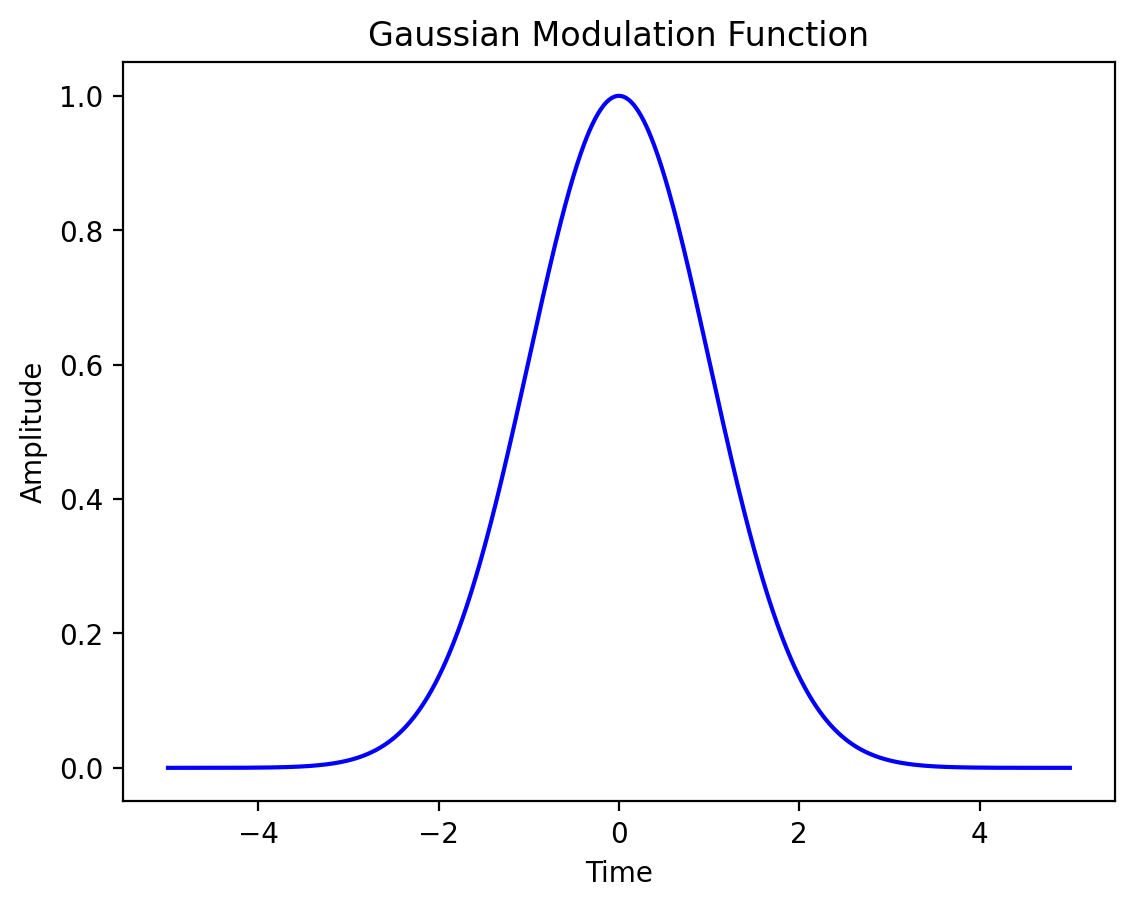

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Define the parameters for the Gaussian modulation function
mean = 0
std_dev = 1
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian modulation function
gaussian_modulation = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Plot the Gaussian modulation function with blue color
plt.plot(time, gaussian_modulation, color='blue')
plt.title('Gaussian Modulation Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

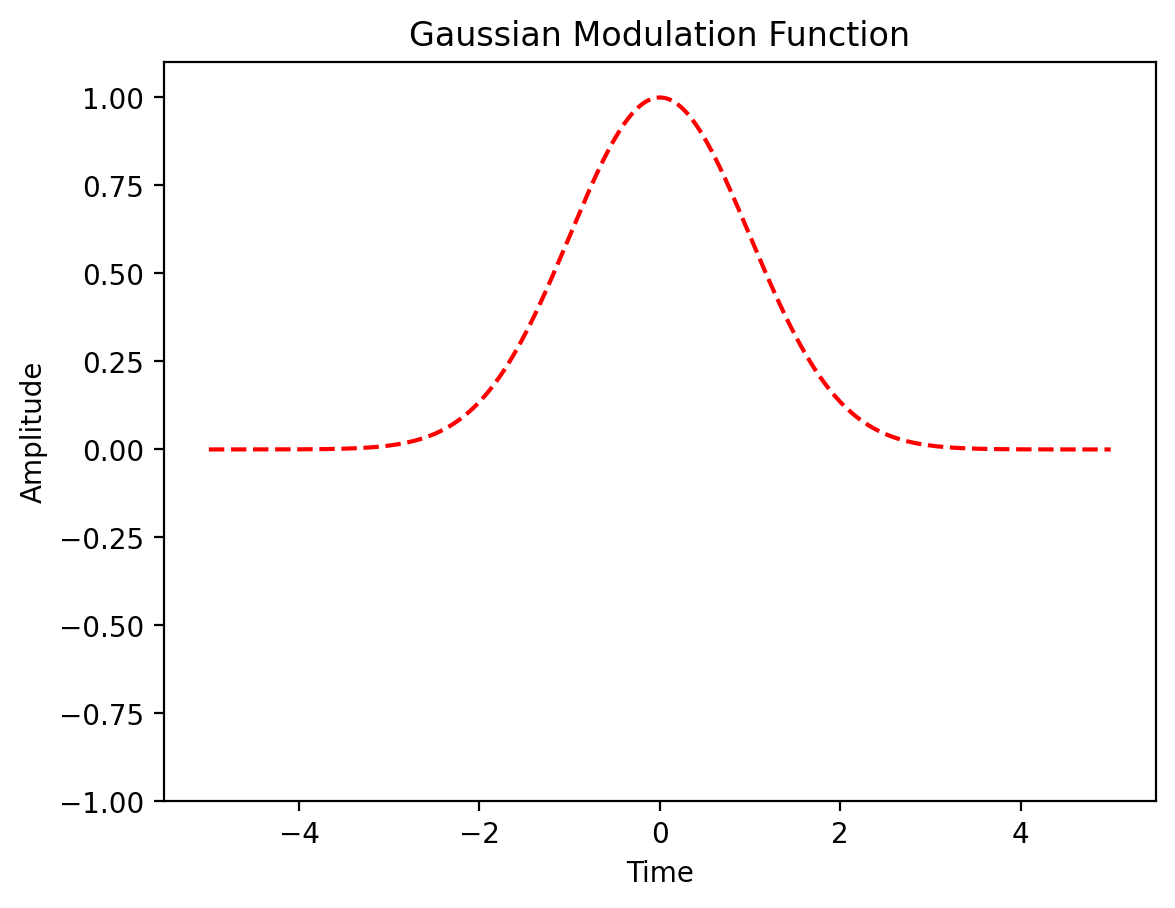

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian modulation function
amplitude = 1
mean = 0
std_dev = 1
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian modulation function
gaussian_modulation = amplitude * np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Plot the Gaussian modulation function
plt.plot(time, gaussian_modulation, color='red', linestyle='dashed', label='Gaussian Modulation')
plt.title('Gaussian Modulation Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-1.0, 1.1)  # Force the y-axis to display the range from -1.0 to 1.0
# plt.legend()
plt.grid(False)
plt.show()

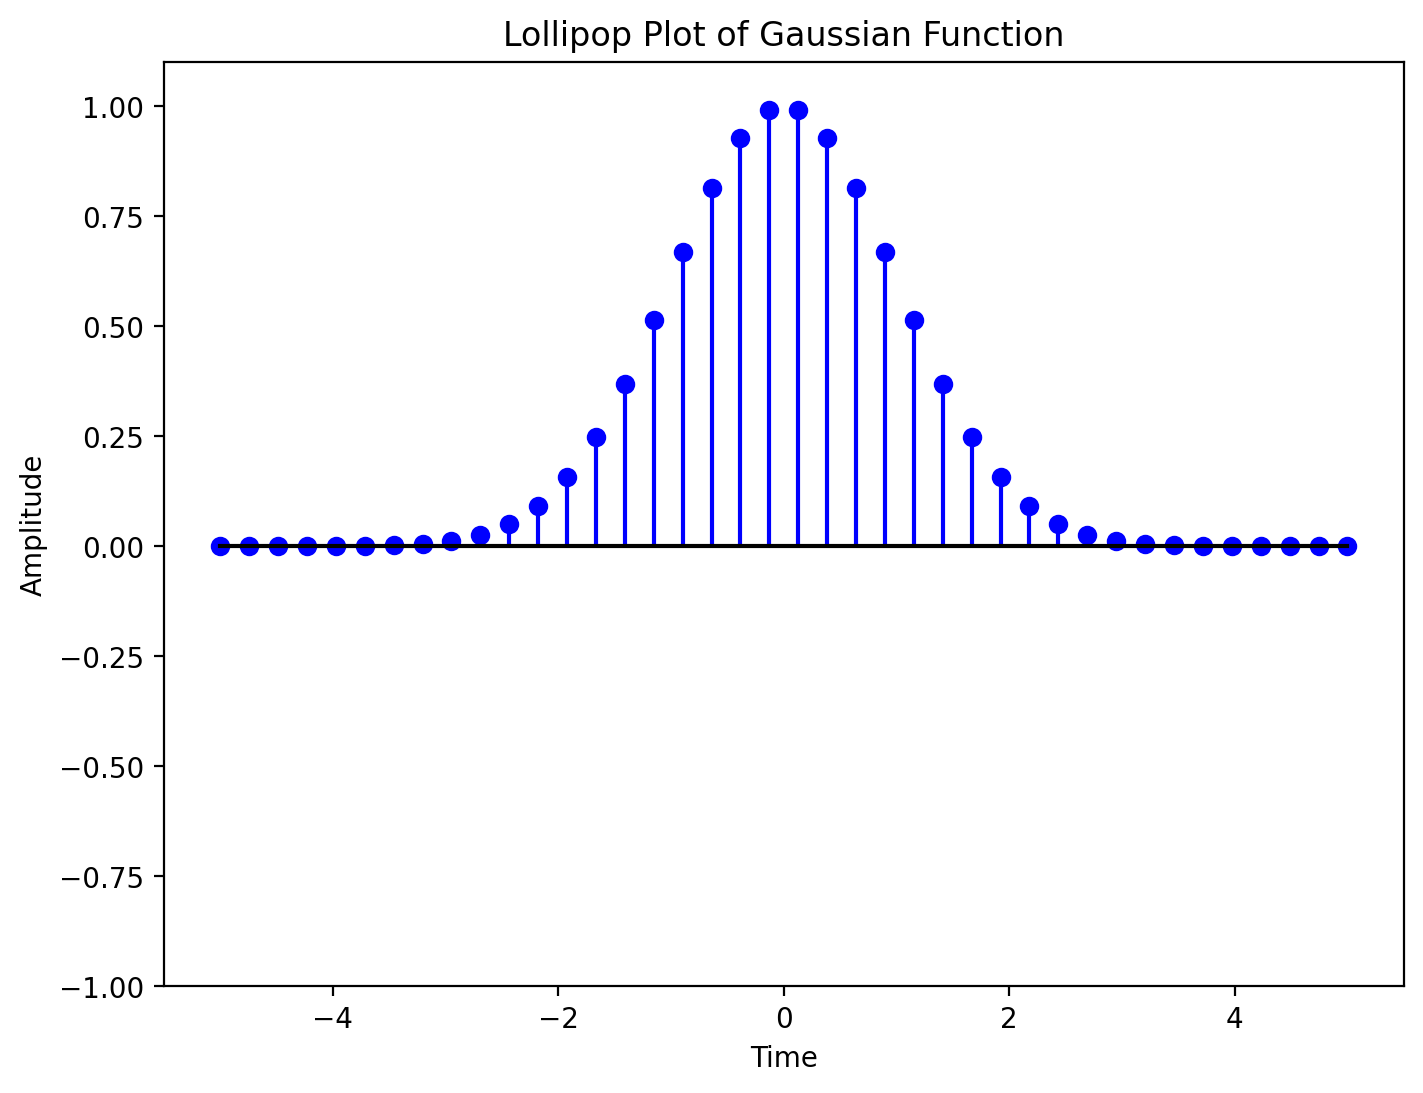

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian function
amplitude = 1
mean = 0
std_dev = 1
time = np.linspace(-5, 5, 20)  # Reduce points for lollipop plot clarity

# Increase the number of points for the lollipop plot
time = np.linspace(-5, 5, 40)  # Doubling the number of points

# Calculate the Gaussian function
gaussian_modulation = amplitude * np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Create the updated lollipop plot with blue color
plt.figure(figsize=(8, 6))
plt.stem(time, gaussian_modulation, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title('Lollipop Plot of Gaussian Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-1.0, 1.1)  # Force the y-axis to display the range from -1.0 to 1.1
plt.grid(False)
plt.show()

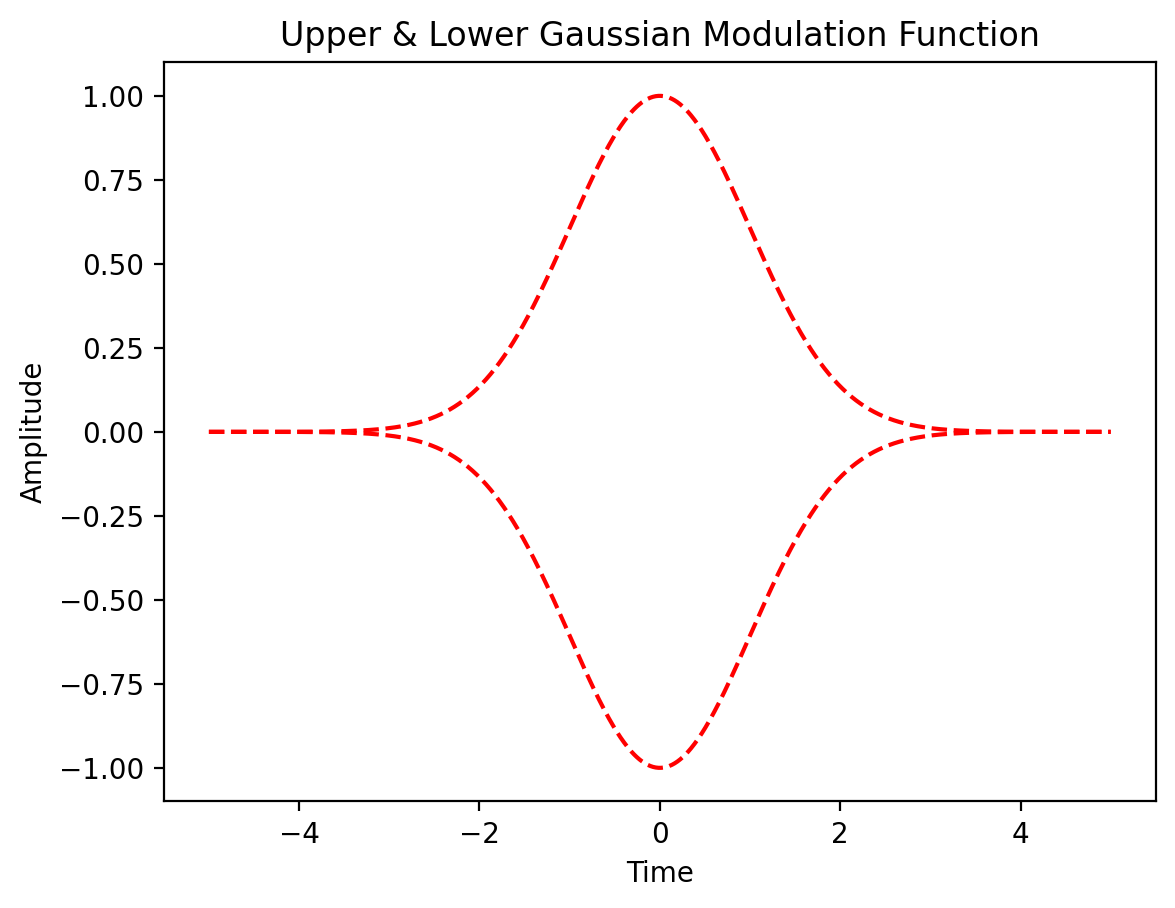

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_modulation = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian function
gaussian_modulated_sine_wave = gaussian_modulation * sine_wave

# Plot only the function of the Gaussian-modulated sine wave
plt.plot(time, gaussian_modulation, color='red', linestyle='dashed', label='Modulation')
plt.plot(time, -gaussian_modulation, color='red', linestyle='dashed')  # Add the negative function for completeness
plt.title('Upper & Lower Gaussian Modulation Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.legend()
plt.grid(False)
plt.show()

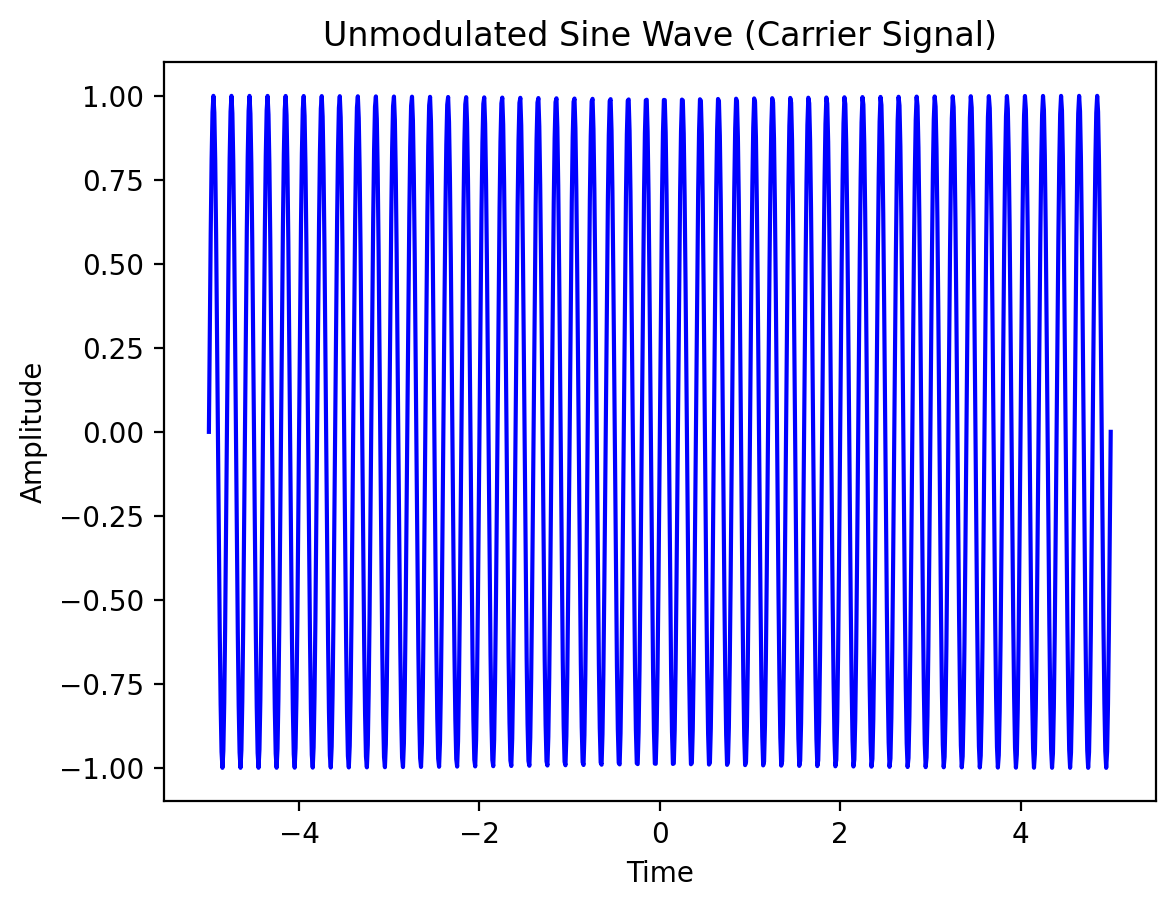

In [40]:
'''
This plot represents a sine wave at a chosen frequency, commonly used to match the resonance frequency
of a quantum device on a chip. In quantum computing, such signals serve as carrier waves for qubit
control pulses before modulation is applied.
'''

import numpy as np
import matplotlib.pyplot as plt

# Define sine wave parameters
amplitude = 1  # Peak amplitude of the wave
frequency = 5  # Frequency of the sine wave (in arbitrary units, could be GHz for quantum systems)
time = np.linspace(-5, 5, 1000)  # Generate 1000 evenly spaced time values from -5 to 5

# Compute the sine wave, representing an unmodulated carrier signal
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Plot the sine wave with blue color
plt.plot(time, sine_wave, color='blue')
plt.title('Unmodulated Sine Wave (Carrier Signal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(False)  # No grid for a cleaner look
plt.show()


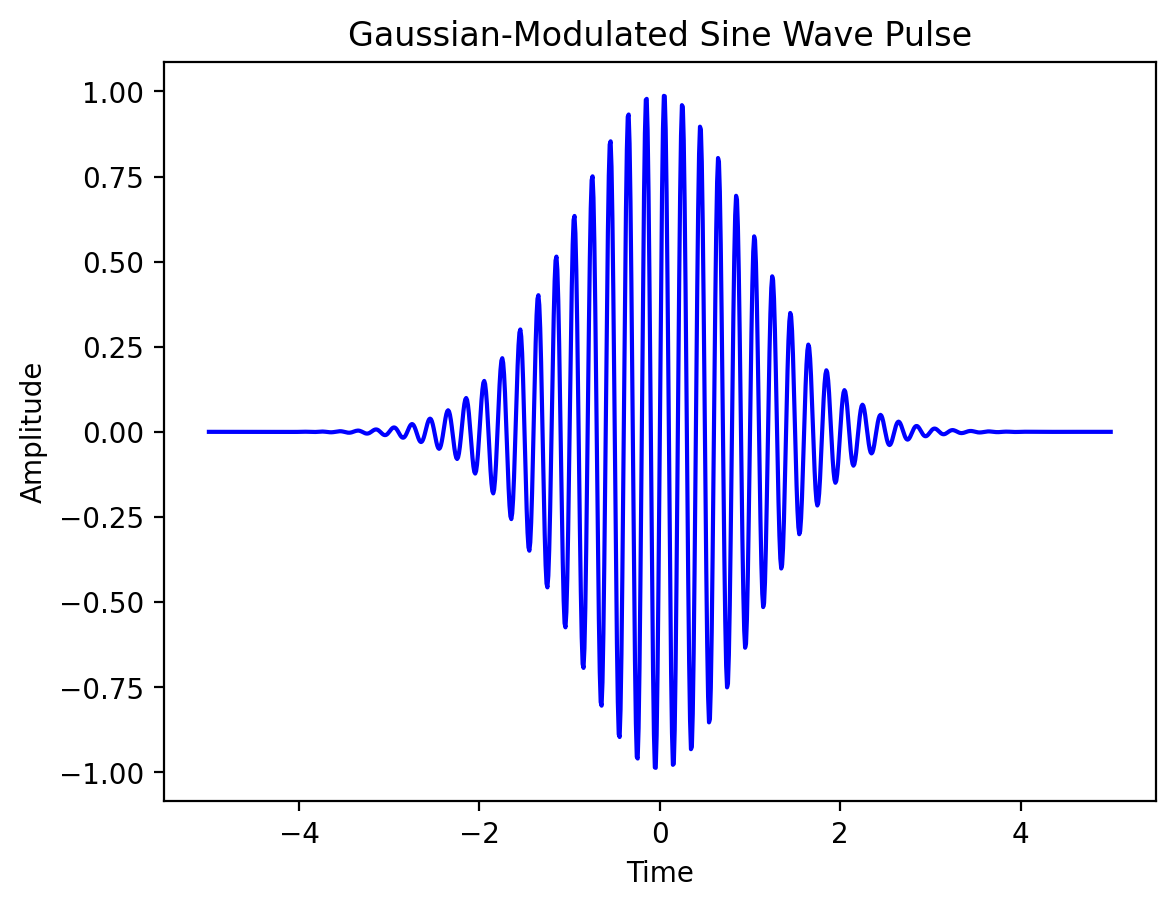

In [41]:
'''
When a modulating pulse shape is applied to an unmodulated sine wave tone, then the result will be a
modulated sine wave output as shown in the plot below. The example shown is modulation by a
Gaussian wave.
'''
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_modulation = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian function
gaussian_modulated_sine_wave = gaussian_modulation * sine_wave

# Plot the Gaussian-modulated sine wave with blue color
plt.plot(time, gaussian_modulated_sine_wave, color='blue')
plt.title('Gaussian-Modulated Sine Wave Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

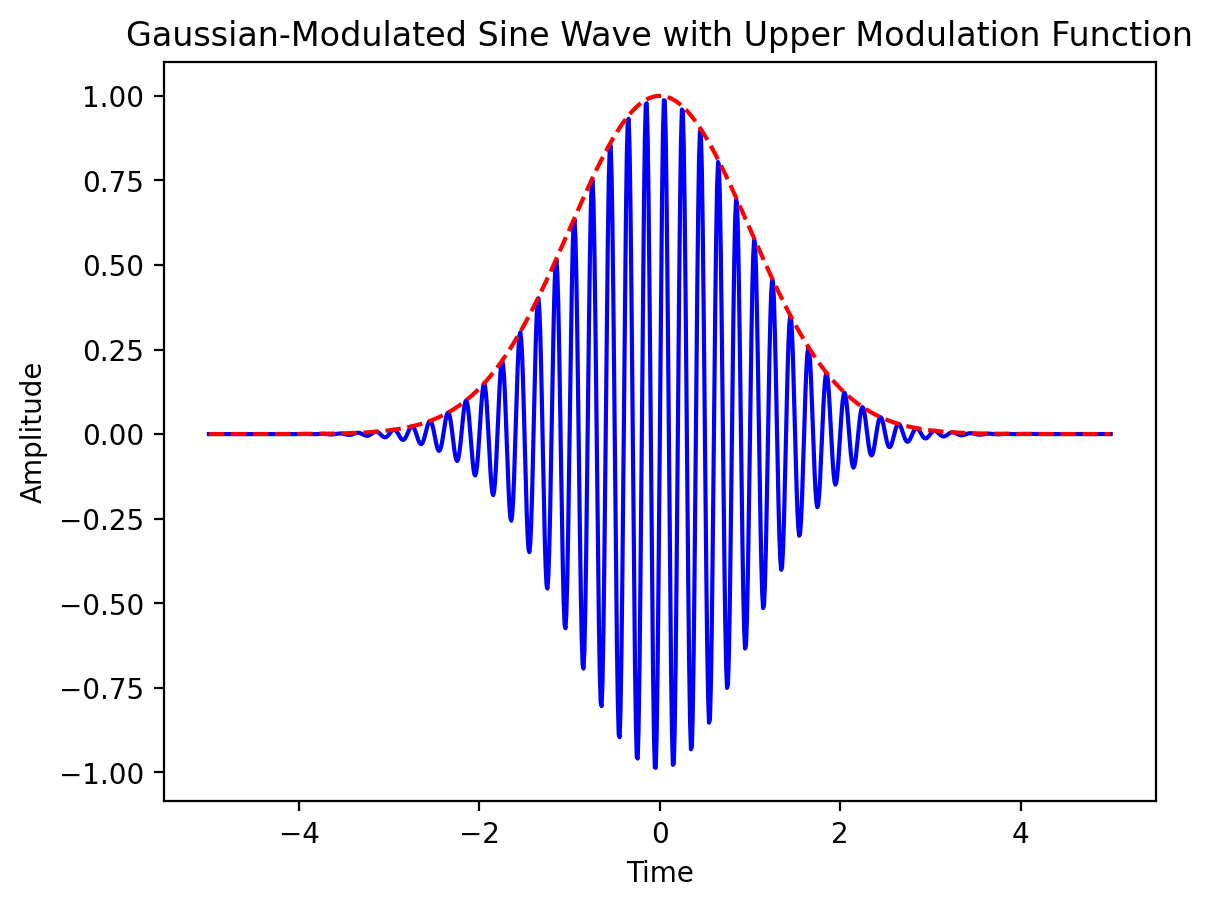

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_modulation = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian function
gaussian_modulated_sine_wave = gaussian_modulation * sine_wave

# Calculate the upper envelope of the modulated sine wave
upper_modulation = np.abs(gaussian_modulation)

# Plot the Gaussian-modulated sine wave and its upper envelope
plt.plot(time, gaussian_modulated_sine_wave, color='blue', label='Gaussian-Modulated Sine Wave Pulse')
plt.plot(time, upper_modulation, color='red', linestyle='dashed', label='Upper Modulation Function')
plt.title('Gaussian-Modulated Sine Wave with Upper Modulation Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.legend()
plt.grid(False)
plt.show()


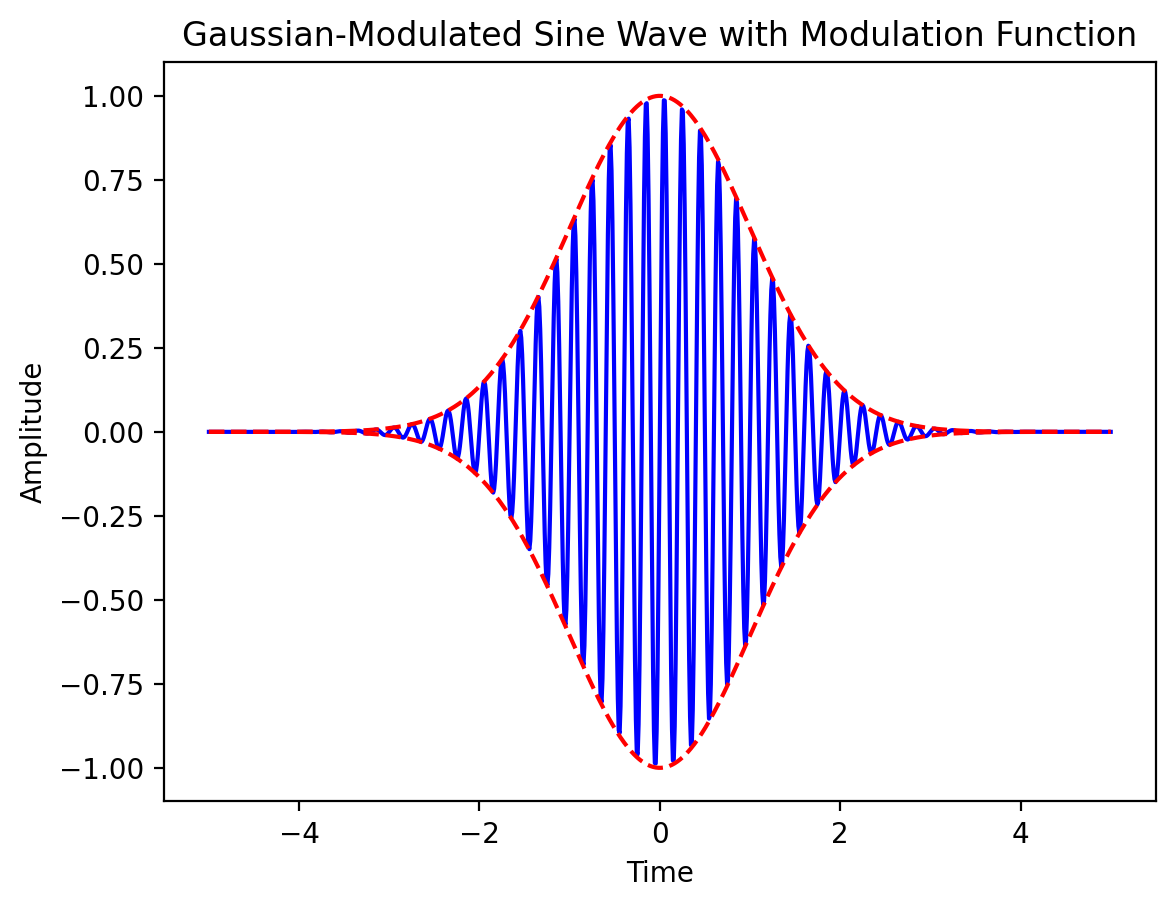

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_modulation = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian function
gaussian_modulated_sine_wave = gaussian_modulation * sine_wave

# Calculate the function of the modulated sine wave
modulation = np.abs(gaussian_modulation)

# Plot the Gaussian-modulated sine wave and its modulation function
plt.plot(time, gaussian_modulated_sine_wave, color='blue', label='Gaussian-Modulated Sine Wave Pulse')
plt.plot(time, modulation, color='red', linestyle='dashed', label='Modulation')
plt.plot(time, -modulation, color='red', linestyle='dashed')  # Add the negative modulation function for completeness
plt.title('Gaussian-Modulated Sine Wave with Modulation Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.legend()
plt.grid(False)
plt.show()


Below are some common pulse envelope shapes used to modulate a sine wave tone.

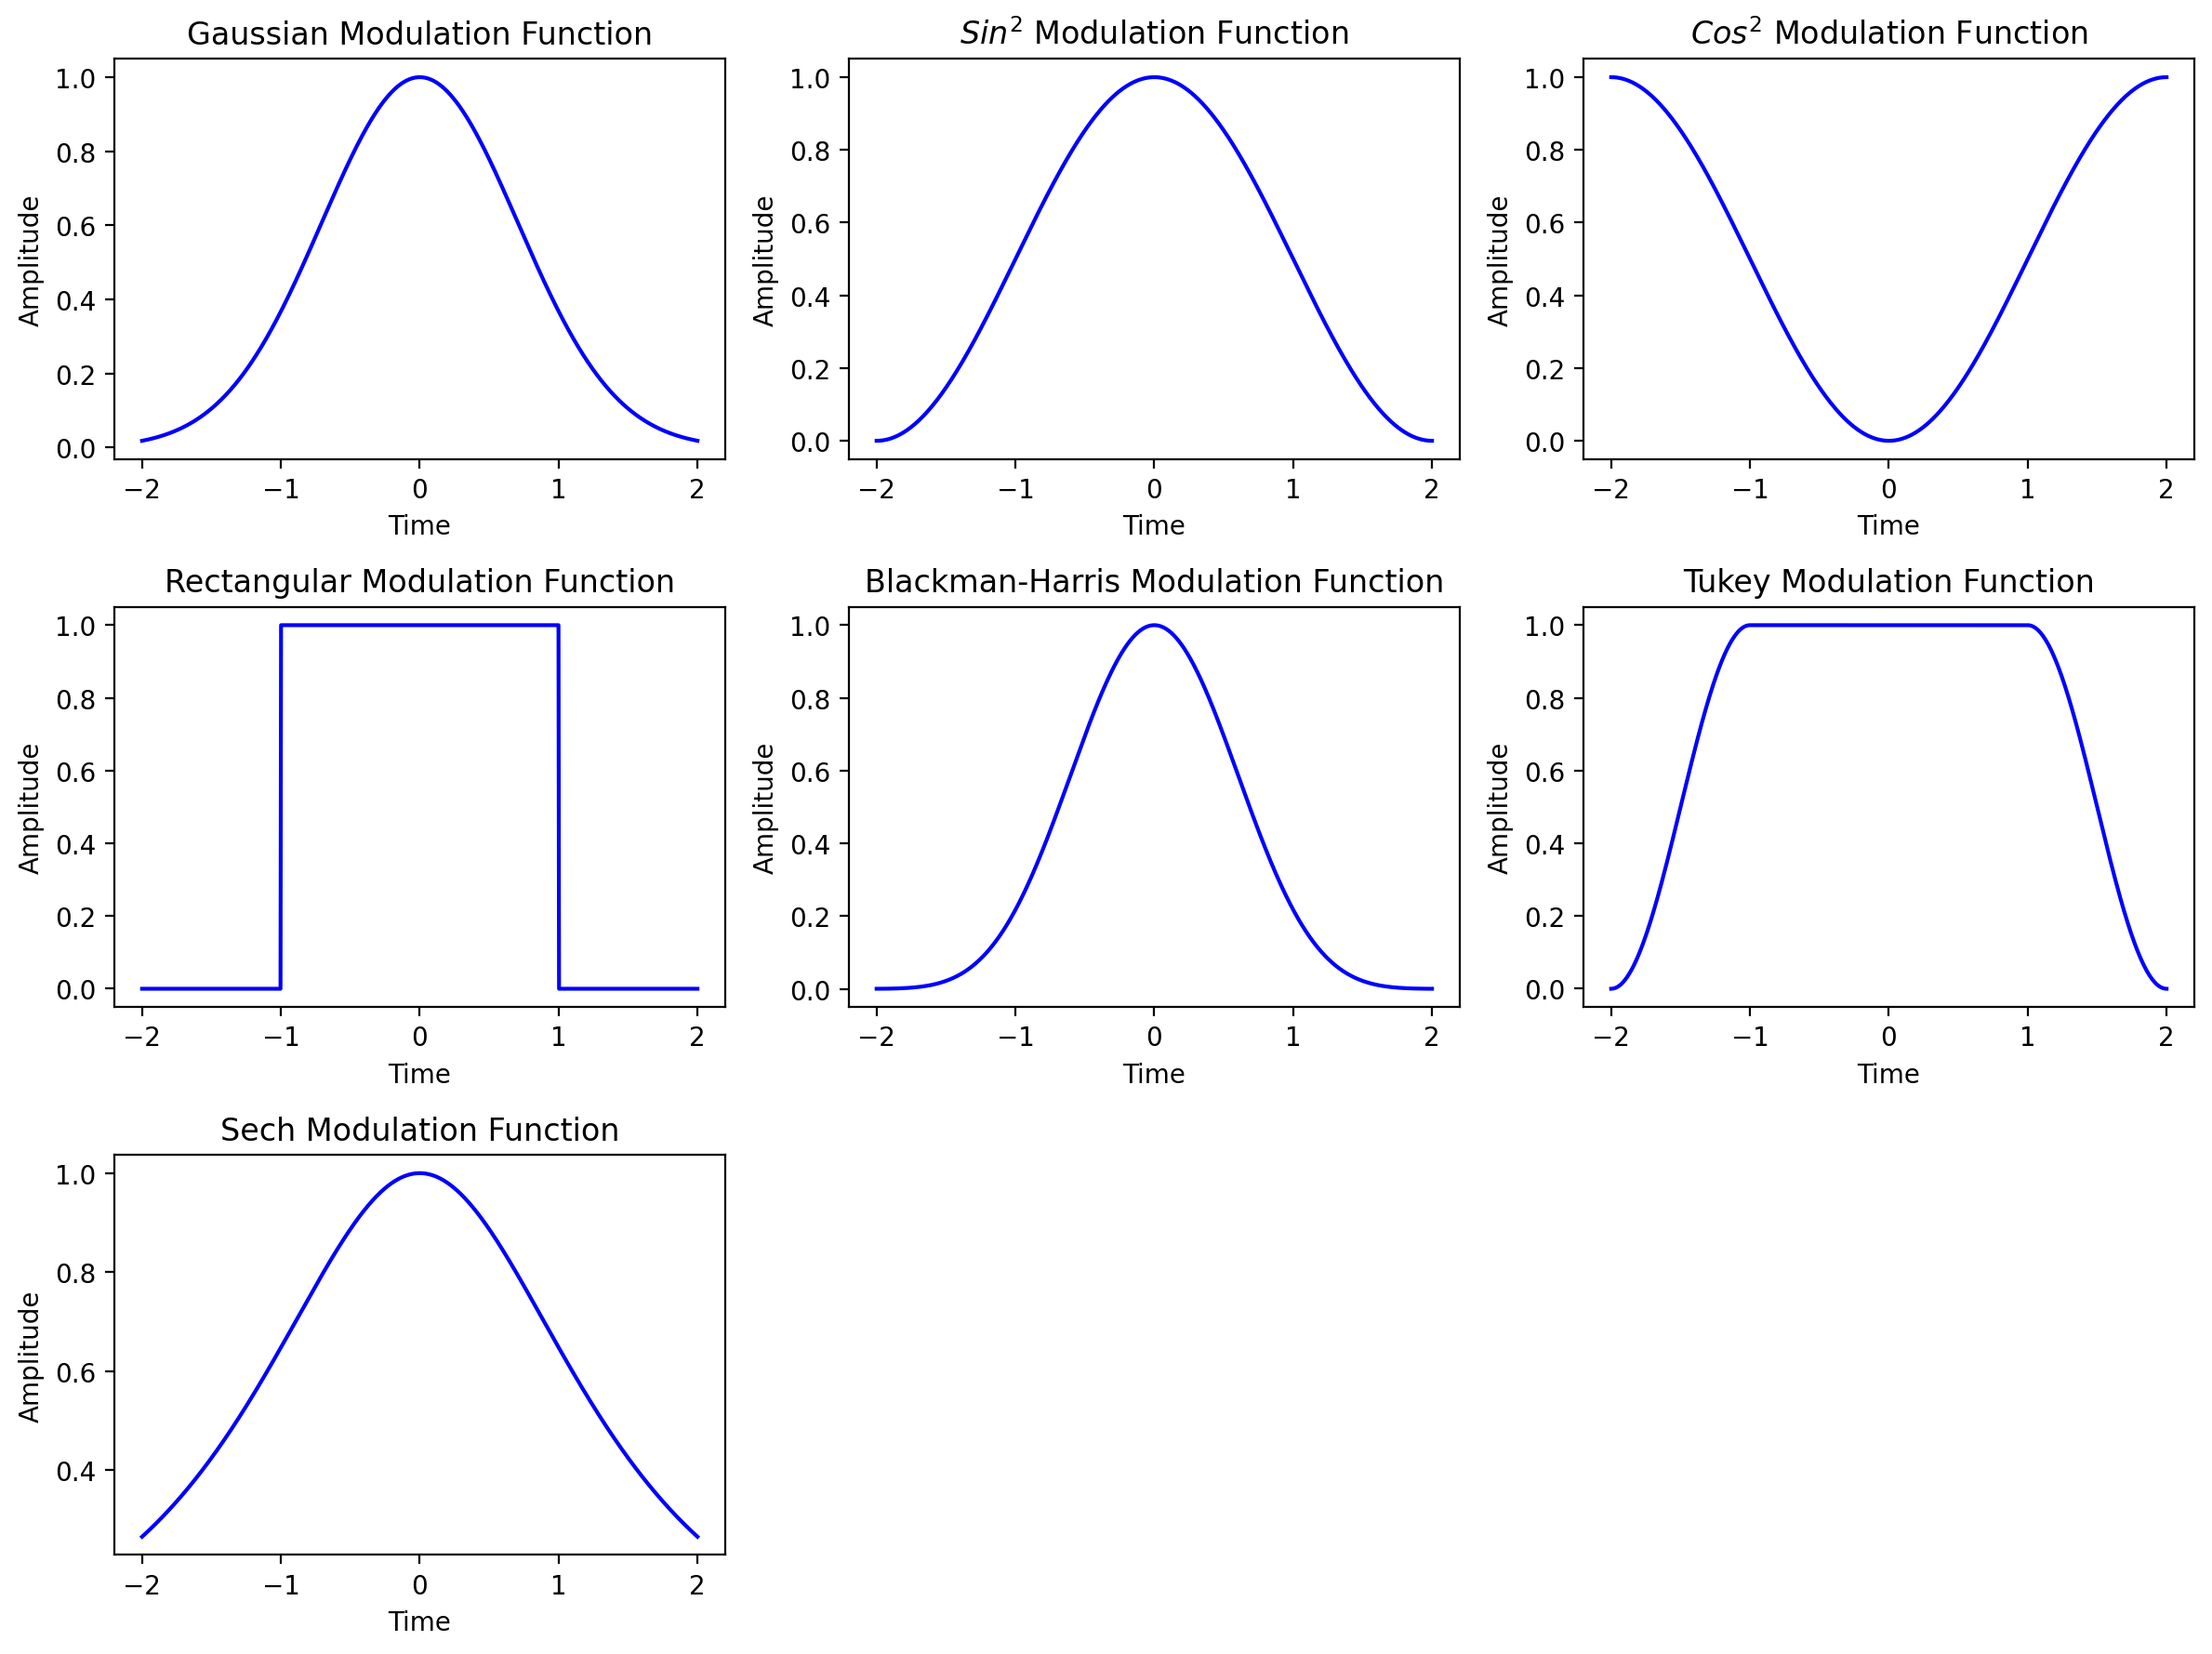

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector
t = np.linspace(-2, 2, 1000)

# Define different pulse envelopes
gaussian = np.exp(-t**2)
sin2 = np.sin(np.pi * (t - t.min()) / (t.max() - t.min()))**2
cos2 = np.cos(np.pi * (t - t.min()) / (t.max() - t.min()))**2
rectangular = np.ones_like(t)
rectangular[np.abs(t) > 1] = 0
blackman_harris = blackmanharris(len(t))
tukey_envelope = tukey(len(t), alpha=0.5)
sech = 1 / np.cosh(t)

# List of envelopes and titles
envelopes = [(gaussian, "Gaussian Modulation Function"),
             (sin2, "$Sin^{2}$ Modulation Function"),
             (cos2, "$Cos^{2}$ Modulation Function"),
             (rectangular, "Rectangular Modulation Function"),
             (blackman_harris, "Blackman-Harris Modulation Function"),
             (tukey_envelope, "Tukey Modulation Function"),
             (sech, "Sech Modulation Function")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (envelope, title) in enumerate(envelopes):
    axes[i].plot(t, envelope, 'b')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    # axes[i].legend([title])

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

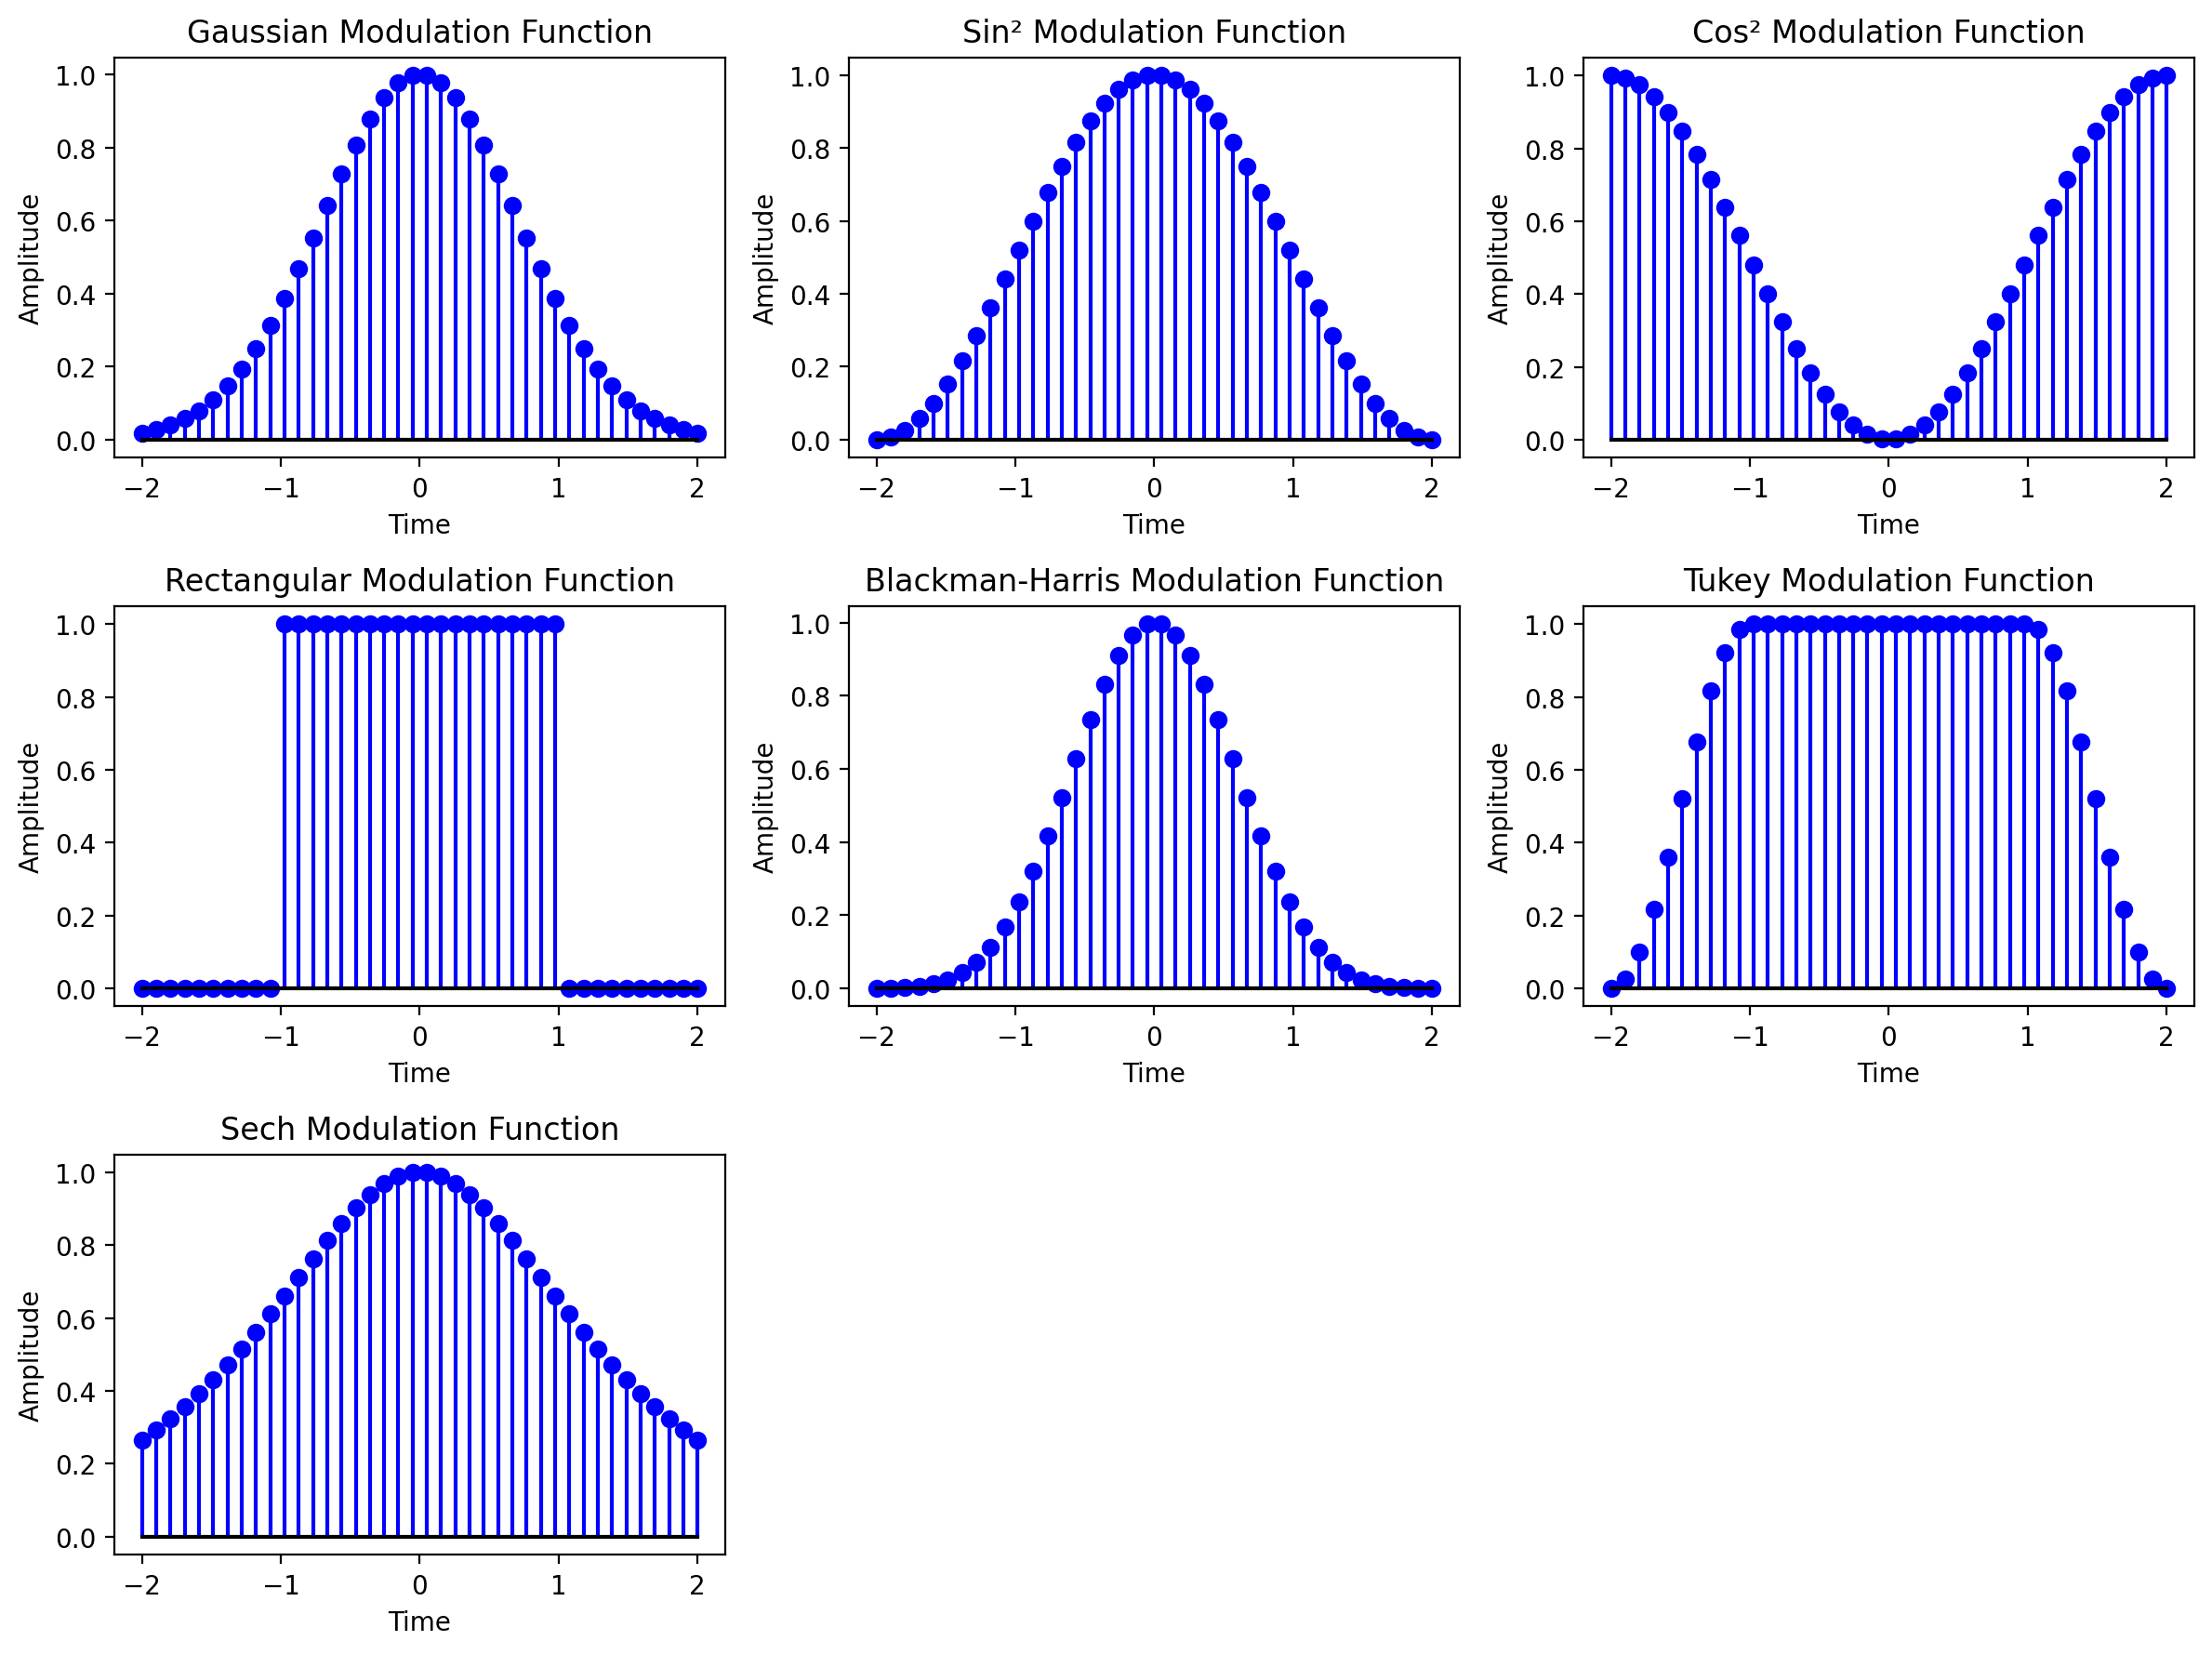

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector with reduced points for lollipop plot clarity
t = np.linspace(-2, 2, 40)

# Define different modulation functions
gaussian_modulation = np.exp(-t**2)
sin2_modulation = np.sin(np.pi * (t - t.min()) / (t.max() - t.min()))**2
cos2_modulation = np.cos(np.pi * (t - t.min()) / (t.max() - t.min()))**2
rectangular_modulation = np.ones_like(t)
rectangular_modulation[np.abs(t) > 1] = 0
blackman_harris_modulation = blackmanharris(len(t))
tukey_modulation = tukey(len(t), alpha=0.5)
sech_modulation = 1 / np.cosh(t)

# List of modulation functions and titles
modulations = [(gaussian_modulation, "Gaussian Modulation Function"),
               (sin2_modulation, "Sin² Modulation Function"),
               (cos2_modulation, "Cos² Modulation Function"),
               (rectangular_modulation, "Rectangular Modulation Function"),
               (blackman_harris_modulation, "Blackman-Harris Modulation Function"),
               (tukey_modulation, "Tukey Modulation Function"),
               (sech_modulation, "Sech Modulation Function")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (modulation, title) in enumerate(modulations):
    axes[i].stem(t, modulation, linefmt='b-', markerfmt='bo', basefmt='k-')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

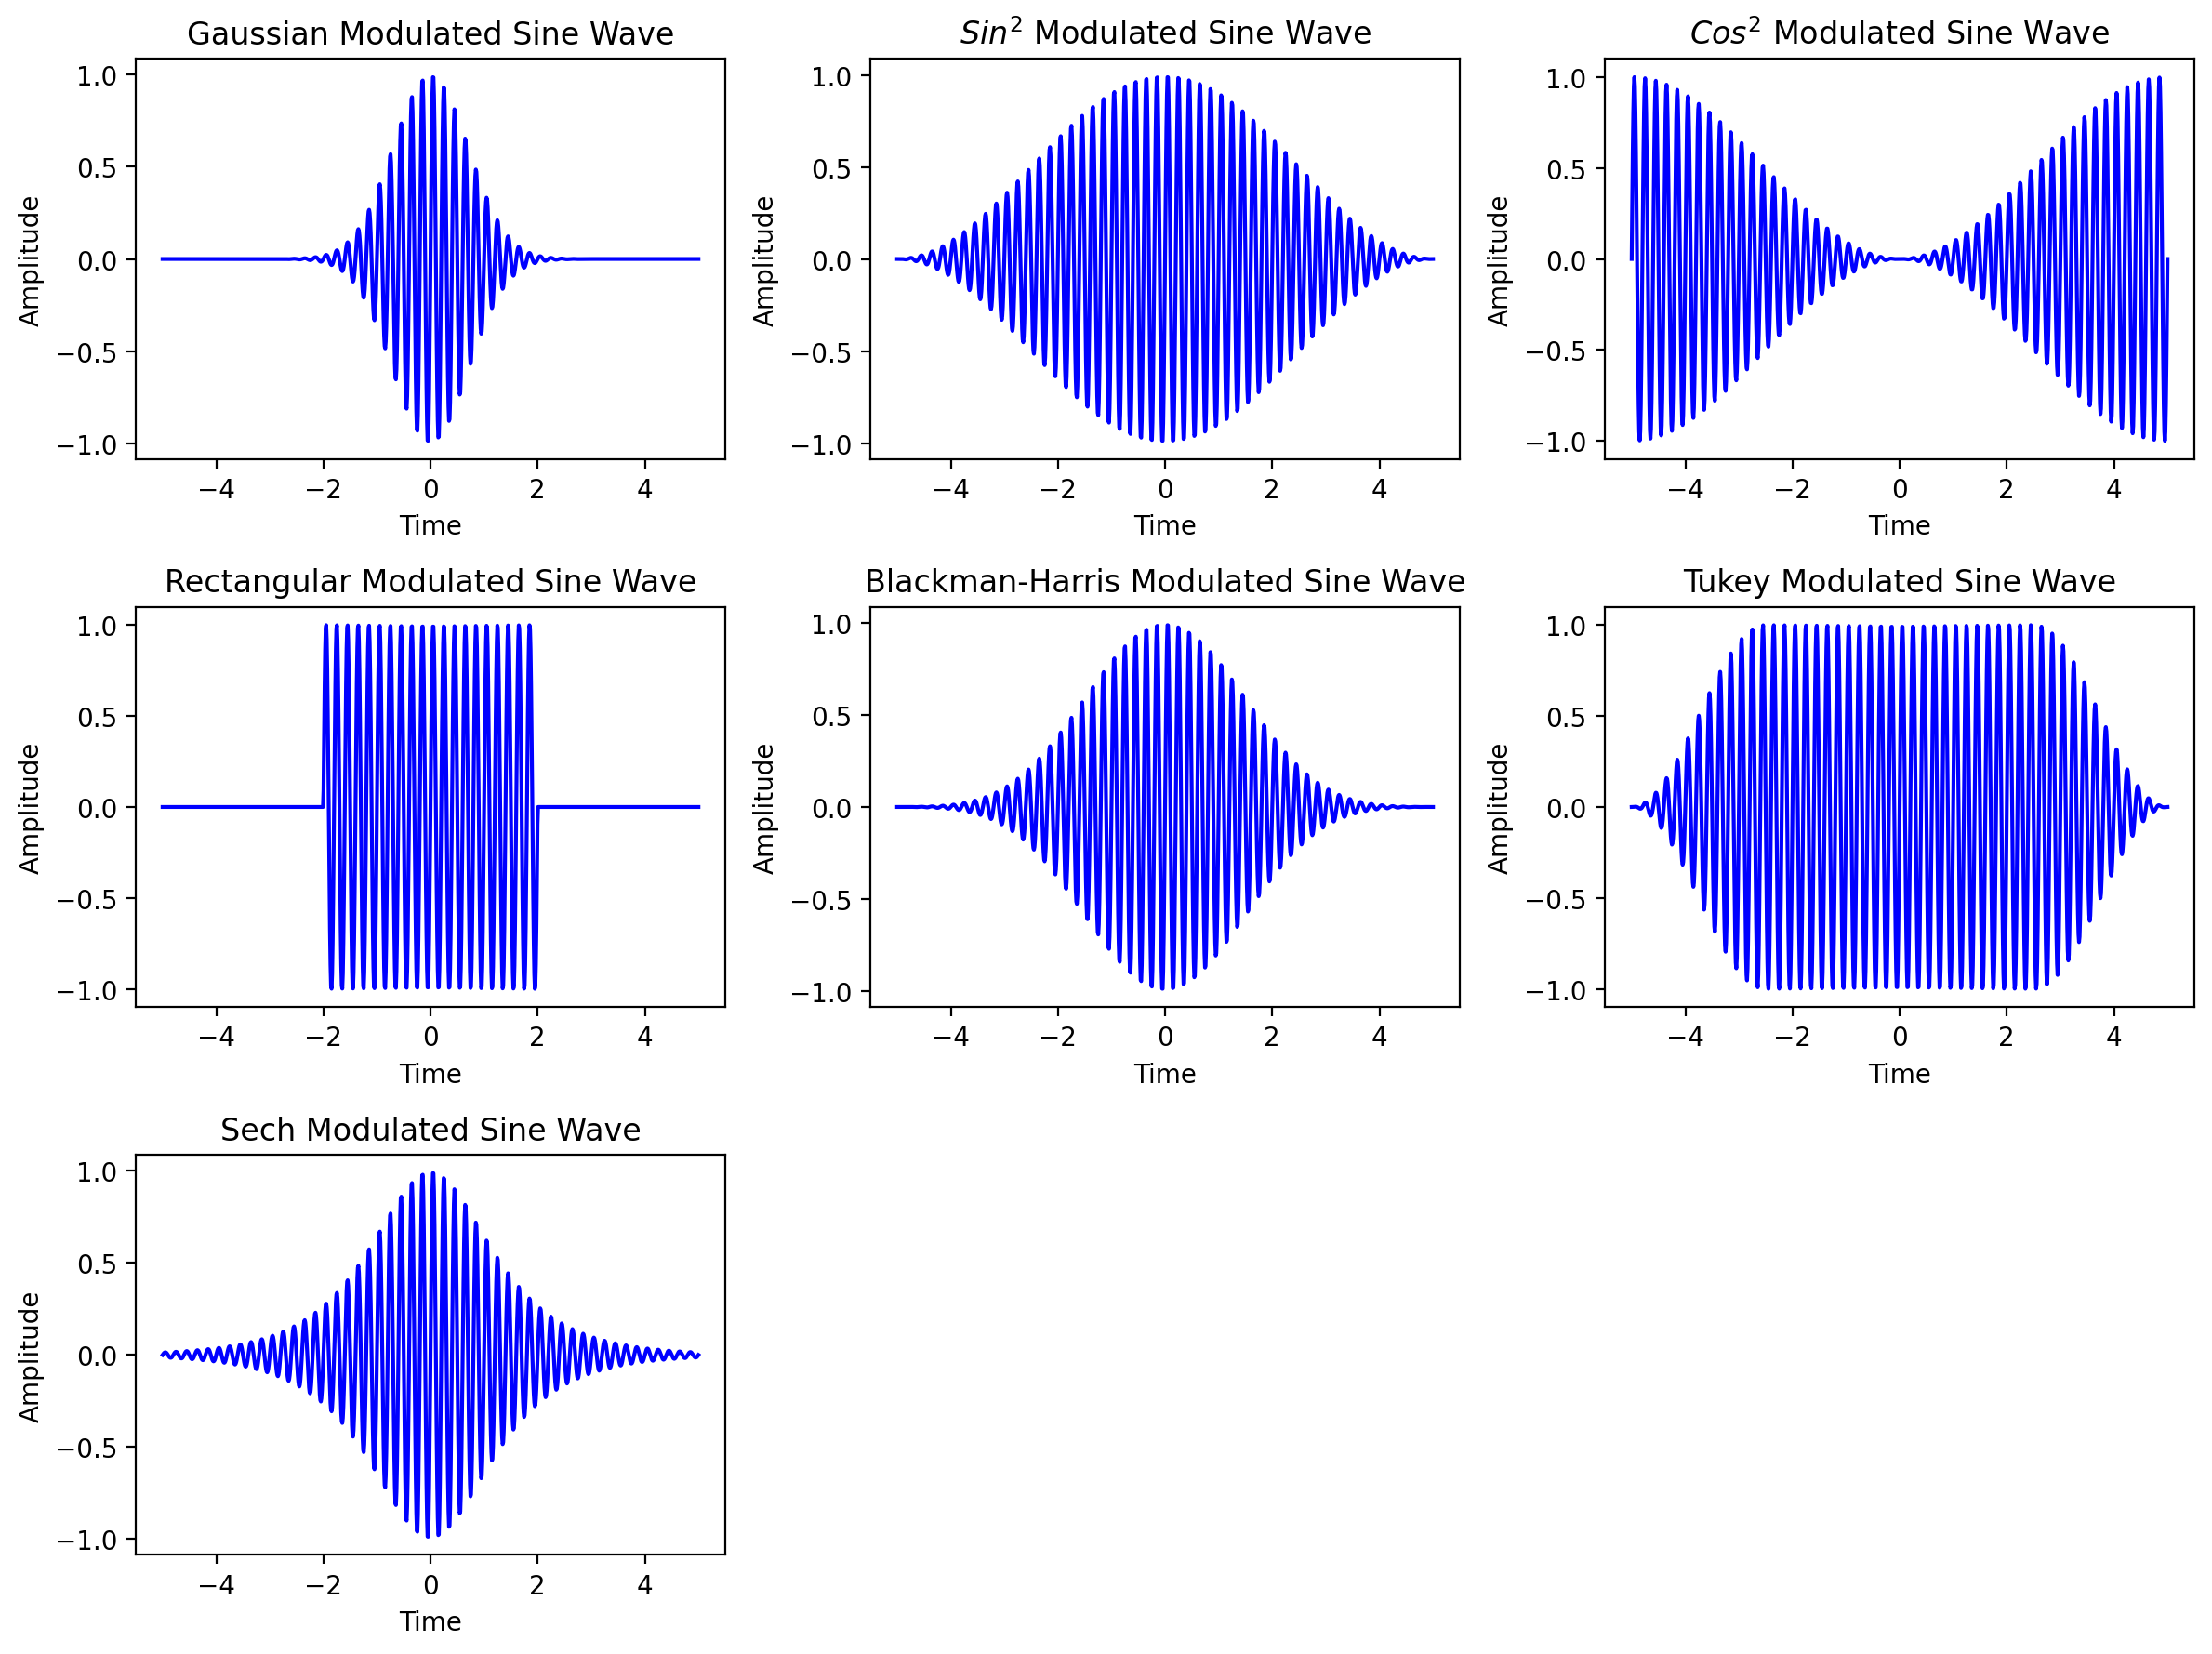

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector
time = np.linspace(-5, 5, 1000)

# Define different modulated sine waves
gaussian_modulated_sine = np.exp(-time**2)
sin2_modulated_sine = np.sin(np.pi * (time - time.min()) / (time.max() - time.min()))**2
cos2_modulated_sine = np.cos(np.pi * (time - time.min()) / (time.max() - time.min()))**2
rectangular_modulated_sine = np.ones_like(time)
rectangular_modulated_sine[np.abs(time) > 2] = 0
blackman_harris_modulated_sine = blackmanharris(len(time))
tukey_modulated_sine = tukey(len(time), alpha=0.5)
sech_modulated_sine = 1 / np.cosh(time)

# Define sine wave parameters
amplitude = 1
frequency = 5  # Frequency of the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# List of modulated sine waves and titles
modulated_sines = [(gaussian_modulated_sine, "Gaussian Modulated Sine Wave"),
                    (sin2_modulated_sine, "$Sin^{2}$ Modulated Sine Wave"),
                    (cos2_modulated_sine, "$Cos^{2}$ Modulated Sine Wave"),
                    (rectangular_modulated_sine, "Rectangular Modulated Sine Wave"),
                    (blackman_harris_modulated_sine, "Blackman-Harris Modulated Sine Wave"),
                    (tukey_modulated_sine, "Tukey Modulated Sine Wave"),
                    (sech_modulated_sine, "Sech Modulated Sine Wave")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (modulated_sine, title) in enumerate(modulated_sines):
    modulated_wave = modulated_sine * sine_wave
    axes[i].plot(time, modulated_wave, 'b')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

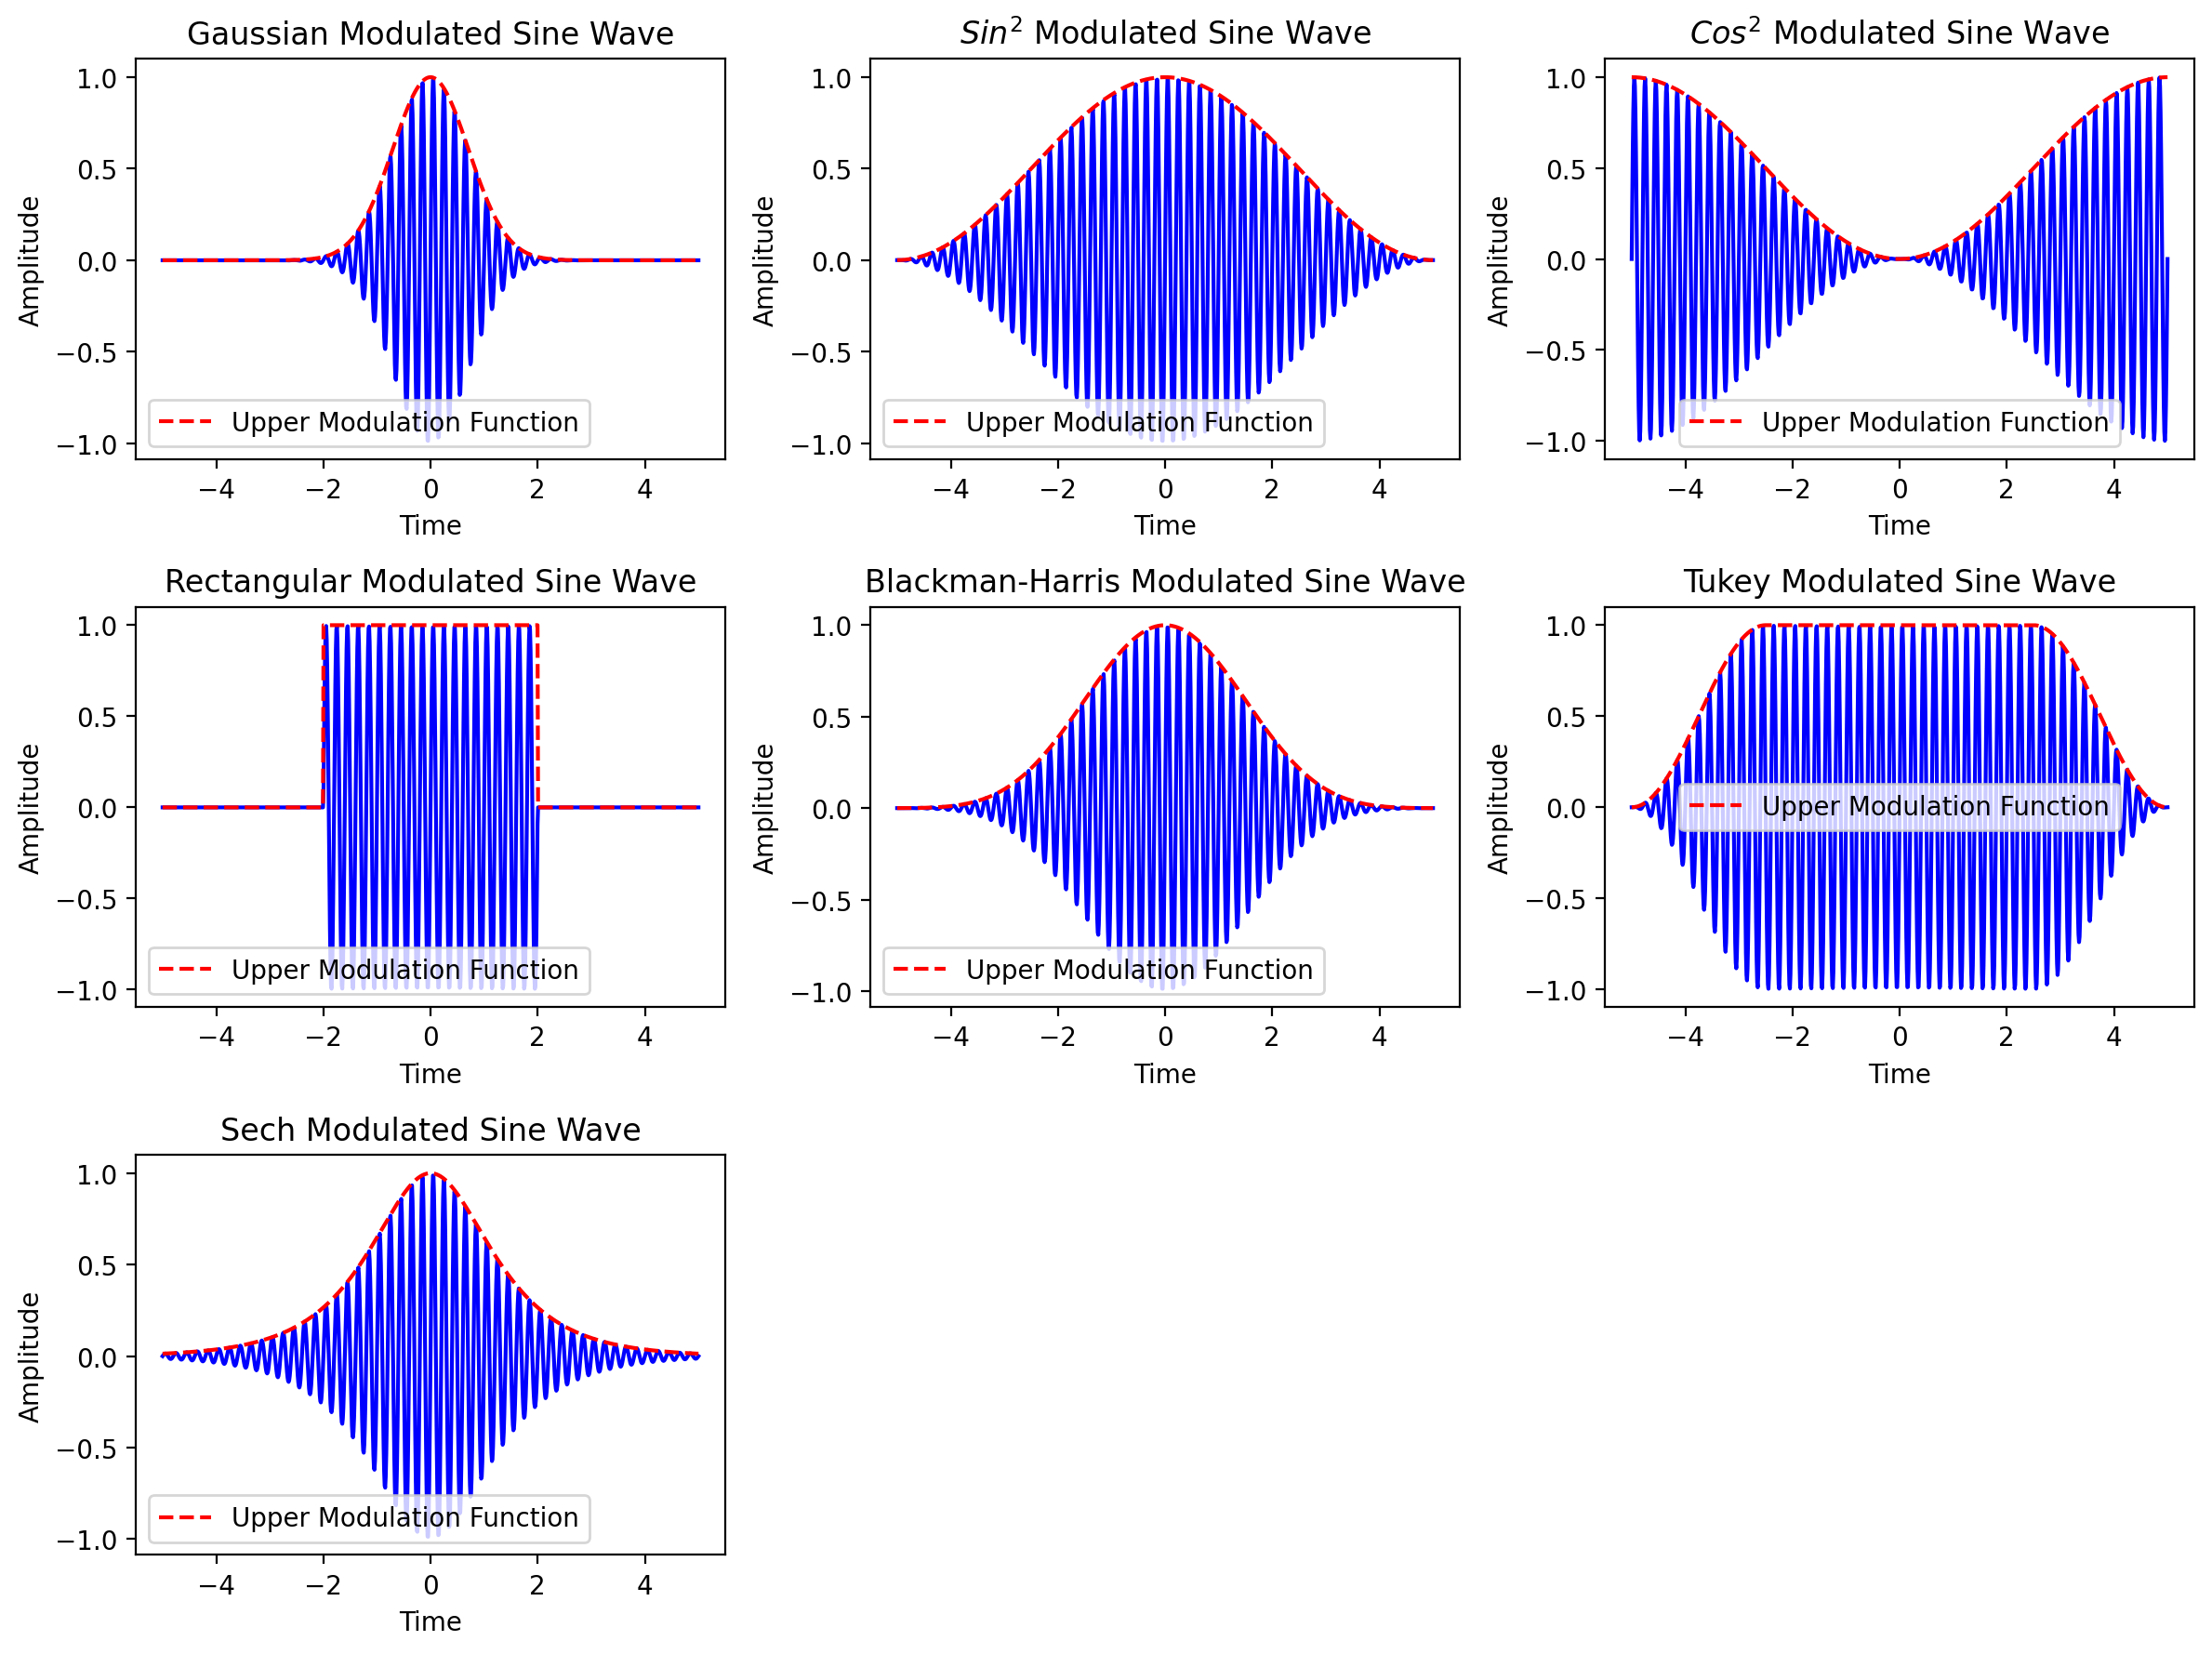

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector
time = np.linspace(-5, 5, 1000)

# Define different modulated sine waves
gaussian_modulated_sine = np.exp(-time**2)
sin2_modulated_sine = np.sin(np.pi * (time - time.min()) / (time.max() - time.min()))**2
cos2_modulated_sine = np.cos(np.pi * (time - time.min()) / (time.max() - time.min()))**2
rectangular_modulated_sine = np.ones_like(time)
rectangular_modulated_sine[np.abs(time) > 2] = 0
blackman_harris_modulated_sine = blackmanharris(len(time))
tukey_modulated_sine = tukey(len(time), alpha=0.5)
sech_modulated_sine = 1 / np.cosh(time)

# Define sine wave parameters
amplitude = 1
frequency = 5  # Frequency of the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# List of modulated sine waves and titles
modulated_sines = [(gaussian_modulated_sine, "Gaussian Modulated Sine Wave"),
                   (sin2_modulated_sine, "$Sin^{2}$ Modulated Sine Wave"),
                   (cos2_modulated_sine, "$Cos^{2}$ Modulated Sine Wave"),
                   (rectangular_modulated_sine, "Rectangular Modulated Sine Wave"),
                   (blackman_harris_modulated_sine, "Blackman-Harris Modulated Sine Wave"),
                   (tukey_modulated_sine, "Tukey Modulated Sine Wave"),
                   (sech_modulated_sine, "Sech Modulated Sine Wave")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (modulated_sine, title) in enumerate(modulated_sines):
    modulated_wave = modulated_sine * sine_wave
    axes[i].plot(time, modulated_wave, 'b')
    axes[i].plot(time, modulated_sine, 'r', linestyle='--', label='Upper Modulation Function')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Below are some applied examples in the context of common quantum gates.

Relevant equations for the **modulated Gaussian pulses** used in the plots for some common quantum gates:

### **1. Gaussian Envelope**
The Gaussian envelope is used to smoothly shape the pulse to minimize spectral leakage:
$
A(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right)
$
where:
- $( A_0 )$ is the peak amplitude,
- $( t_0 )$ is the pulse center,
- $( \sigma )$ determines the width of the pulse.

### **2. Modulated Pulse for Pauli-X Gate**
The **Pauli-X gate** is implemented with a **zero-phase cosine modulation**:
$
E_X(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2\pi f_c t + \phi_X)
$
where:
- $( f_c )$ is the carrier frequency (typically GHz range),
- $( \phi_X = 0 )$ for an **X gate**.
- The modulation is centered at the qubit frequency with **zero phase shift**, leading to a cosine-like oscillation.

### **3. Modulated Pulse for Pauli-Y Gate**
The **Pauli-Y gate** is implemented with a **$(\pi/2)$ phase-shifted cosine modulation**:
$
E_Y(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2\pi f_c t + \phi_Y)
$
where:
- $( \phi_Y = \frac{\pi}{2} )$ shifts the phase by 90° (producing a sine-like waveform).
- The modulation has a **$( \pi/2 )$ phase shift**, which shifts the waveform by a quarter cycle, making it a sine-like oscillation.

### **4. Why No Pulse for Pauli-Z Gate?**
For **Pauli-Z $( Z )$**, no physical pulse is needed because it is implemented as a **virtual phase shift**:
$
|0\rangle \rightarrow |0\rangle, \quad |1\rangle \rightarrow e^{i\theta}|1\rangle
$
This shift is typically done in software rather than by applying a physical pulse.

---

Relevant equations in table form, for the **modulated Gaussian pulses** used in the plots for some common quantum gates:

| Gate | Equation |
|------|----------|
| **Gaussian Envelope** | $$ A(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) $$ |
| **Pauli-X Gate** | $$ E_X(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2\pi f_c t + \phi_X) $$ |
| **Pauli-Y Gate** | $$ E_Y(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2\pi f_c t + \phi_Y) $$ |
| **Hadamard Gate** | $$ E_H(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2\pi f_c t + \phi_H) $$ |
| **CNOT Target Qubit Pulse** | $$ E_{CNOT}(t) = A_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2\pi f_c t + \phi_X) $$ |

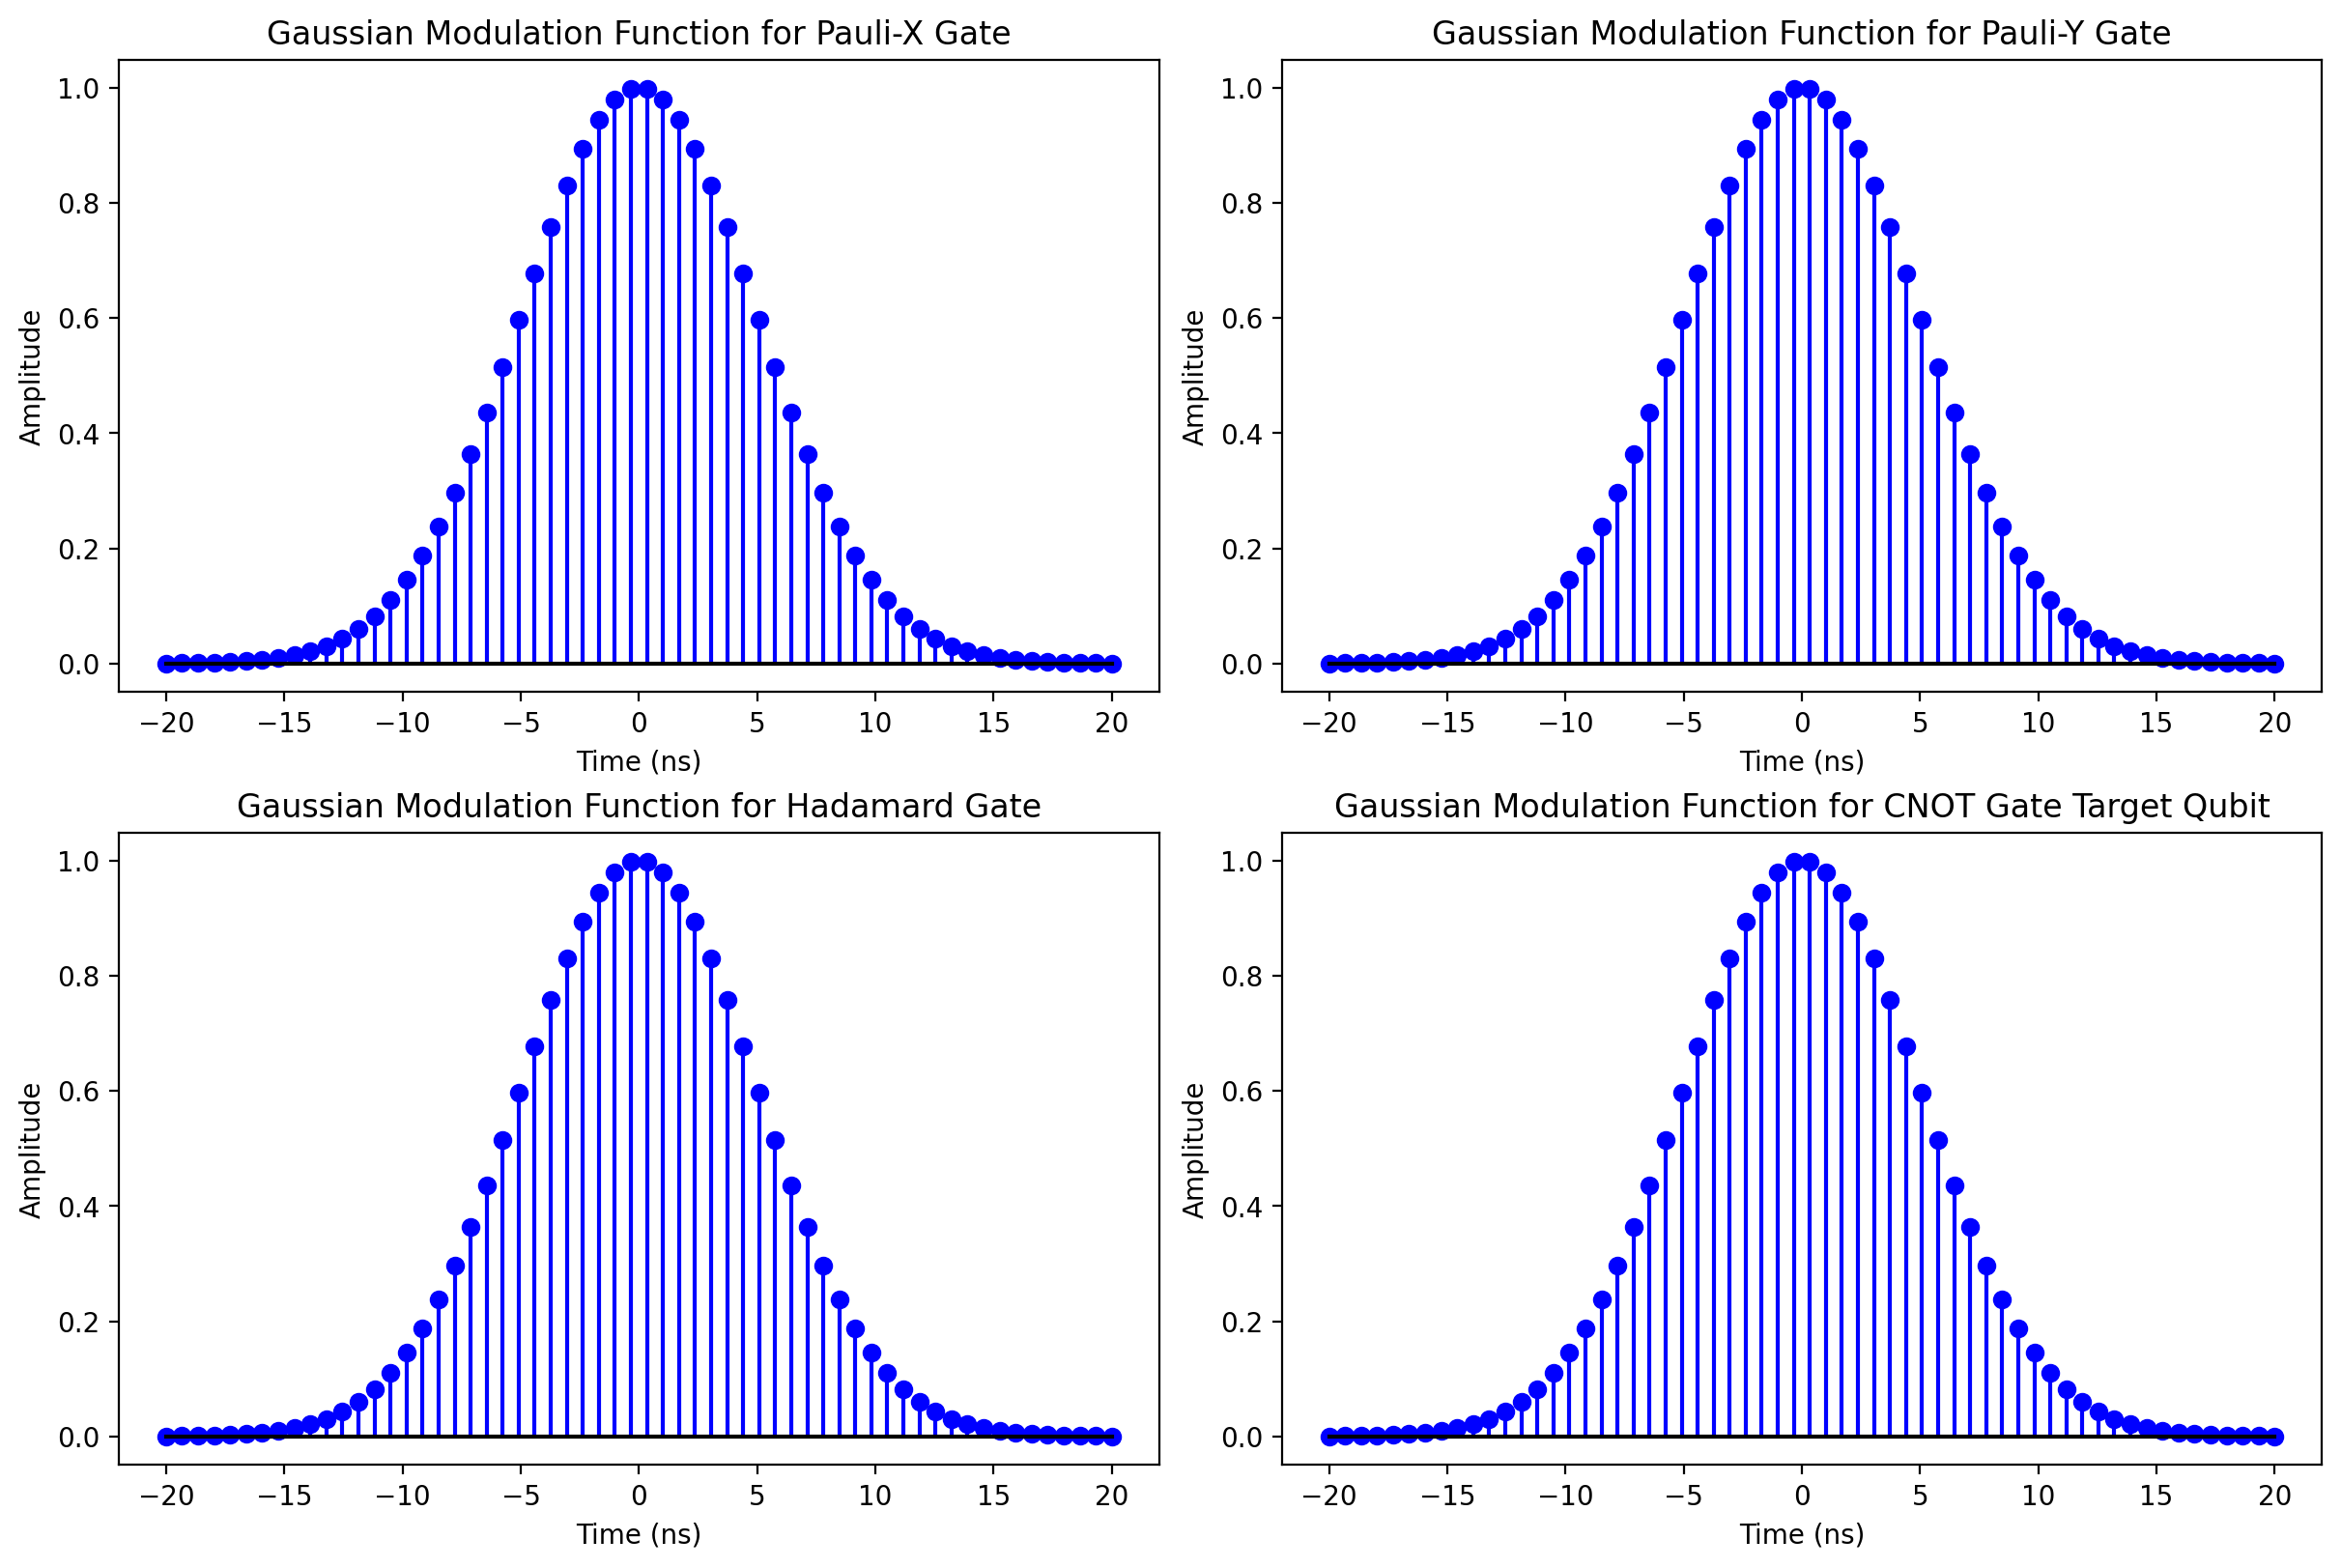

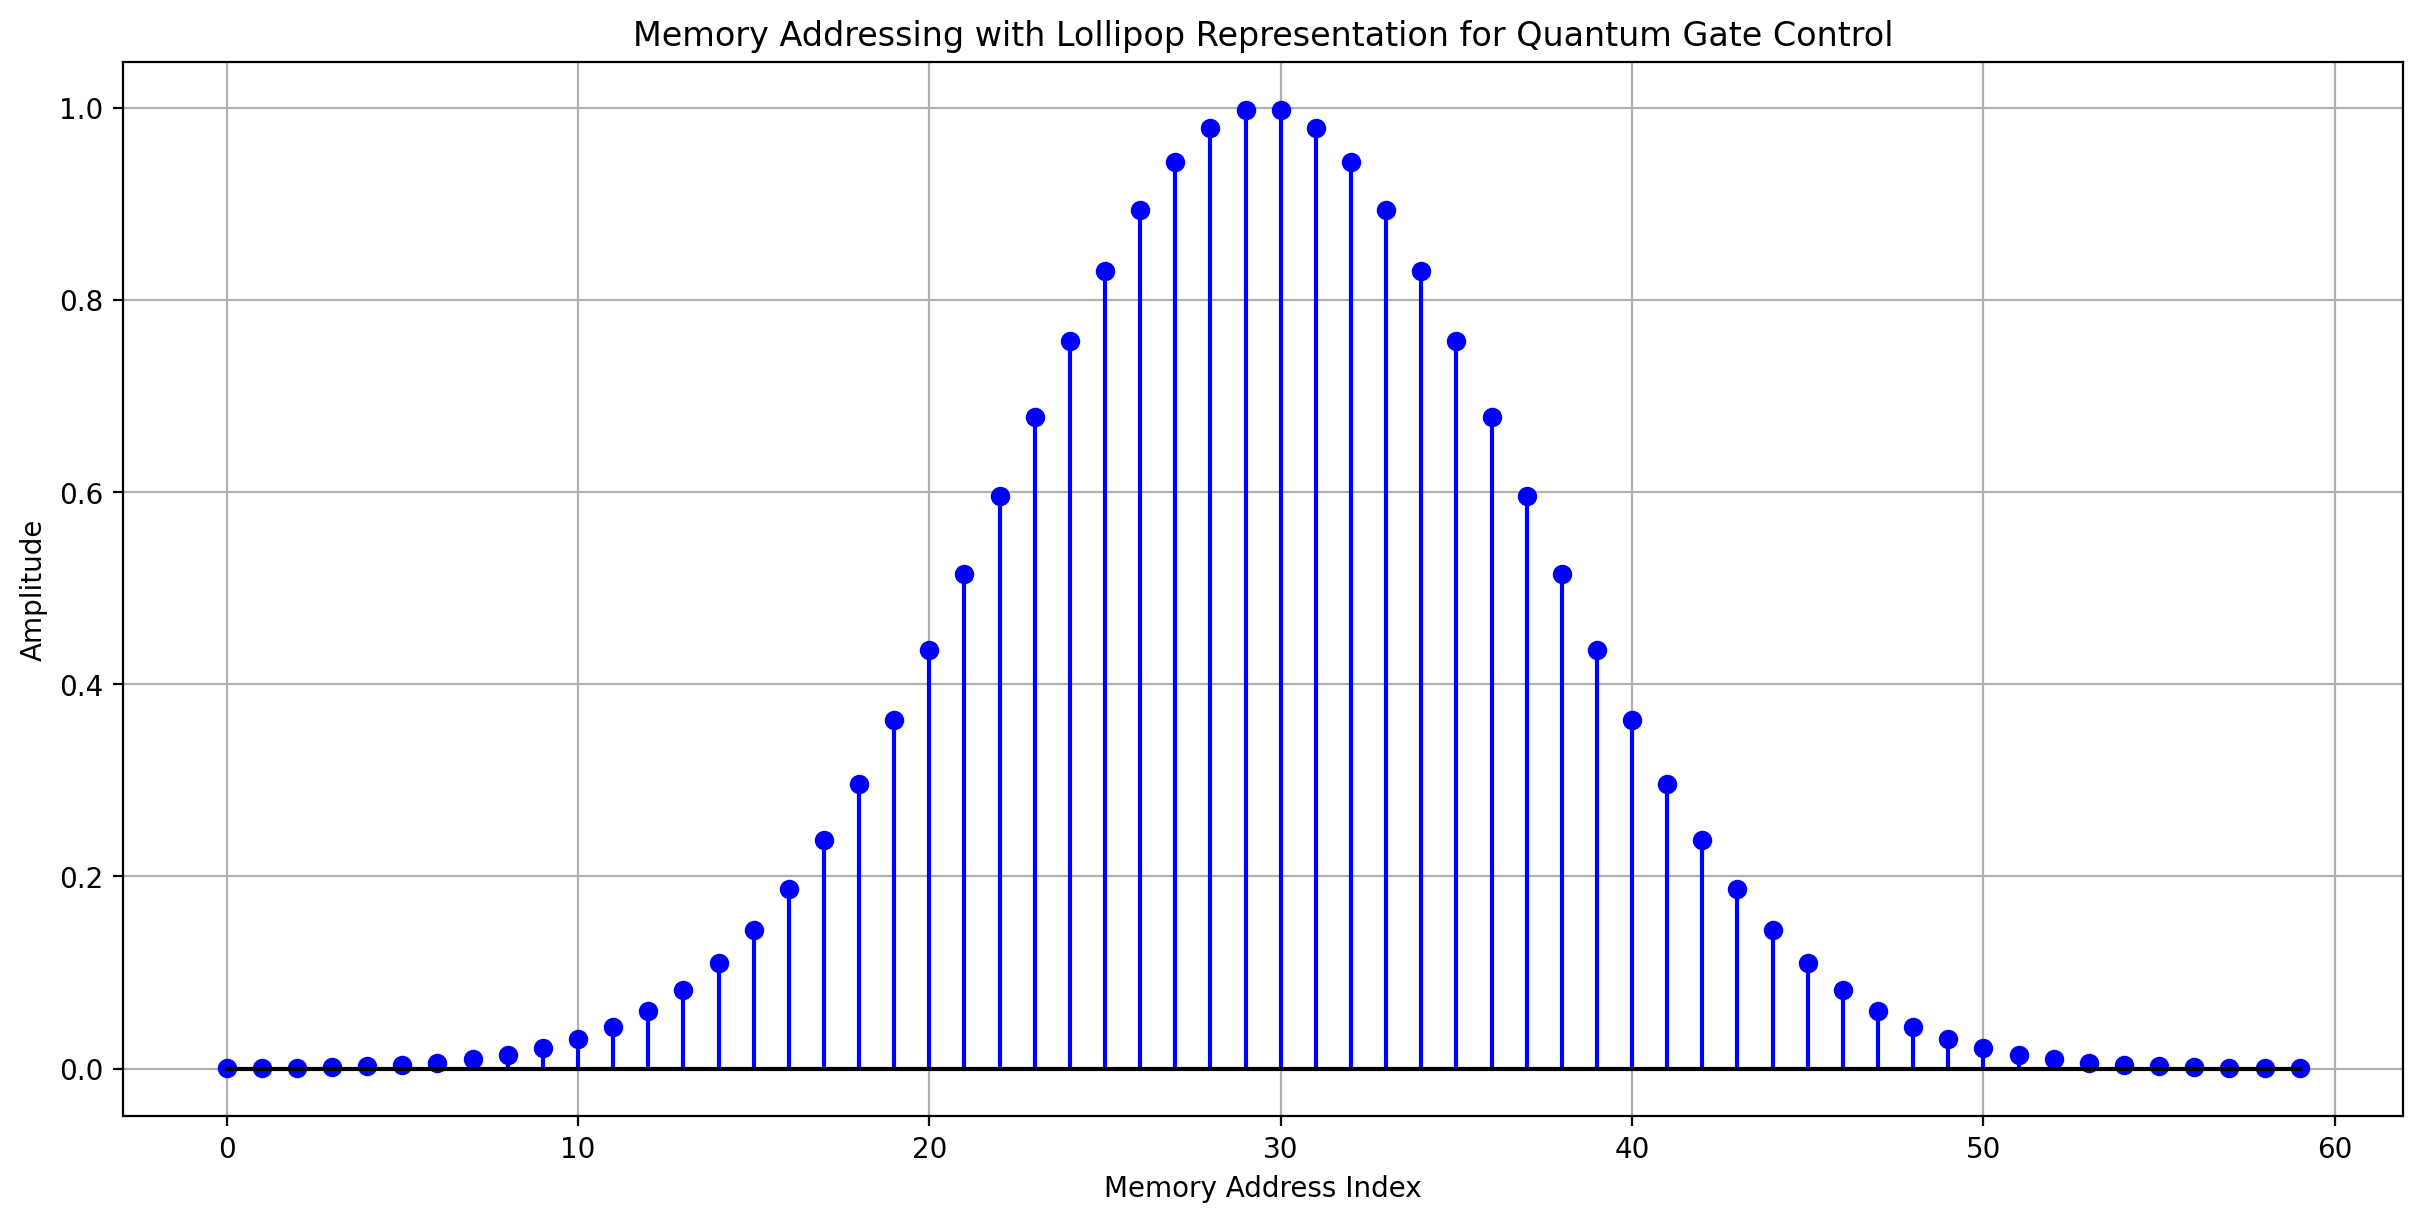

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t0 = 0      # Pulse center
sigma = 5   # Standard deviation of Gaussian modulation function (ns)
A0 = 1      # Peak amplitude

# Increase the number of points by 1.5x for denser lollipop visualization
num_points = int(40 * 1.5)
t = np.linspace(-20, 20, num_points)  # Adjusted time axis

# Compute Gaussian modulation function
gaussian_modulation = A0 * np.exp(-(t - t0)**2 / (2 * sigma**2))

# Store modulation functions and titles in an array
modulations = [
    (gaussian_modulation, "Gaussian Modulation Function for Pauli-X Gate"),
    (gaussian_modulation, "Gaussian Modulation Function for Pauli-Y Gate"),
    (gaussian_modulation, "Gaussian Modulation Function for Hadamard Gate"),
    (gaussian_modulation, "Gaussian Modulation Function for CNOT Gate Target Qubit")
]

# Create a figure with constrained layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axs = axs.flatten()

# Lollipop plot setup
for ax, (modulation, title) in zip(axs, modulations):
    ax.stem(t, modulation, linefmt='b-', markerfmt='bo', basefmt='k-')
    ax.set_title(title)
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("Amplitude")

# Memory Addressing with Lollipop Representation
fig_combined, ax_combined = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Memory addresses as an index range
memory_addresses = np.arange(len(t))

# Lollipop-style plot for memory addressing
ax_combined.stem(memory_addresses, gaussian_modulation, linefmt='b-', markerfmt='bo', basefmt='k-')

# Labels and title
ax_combined.set_title("Memory Addressing with Lollipop Representation for Quantum Gate Control")
ax_combined.set_xlabel("Memory Address Index")
ax_combined.set_ylabel("Amplitude")
ax_combined.grid(True)

# Display plots
plt.show()

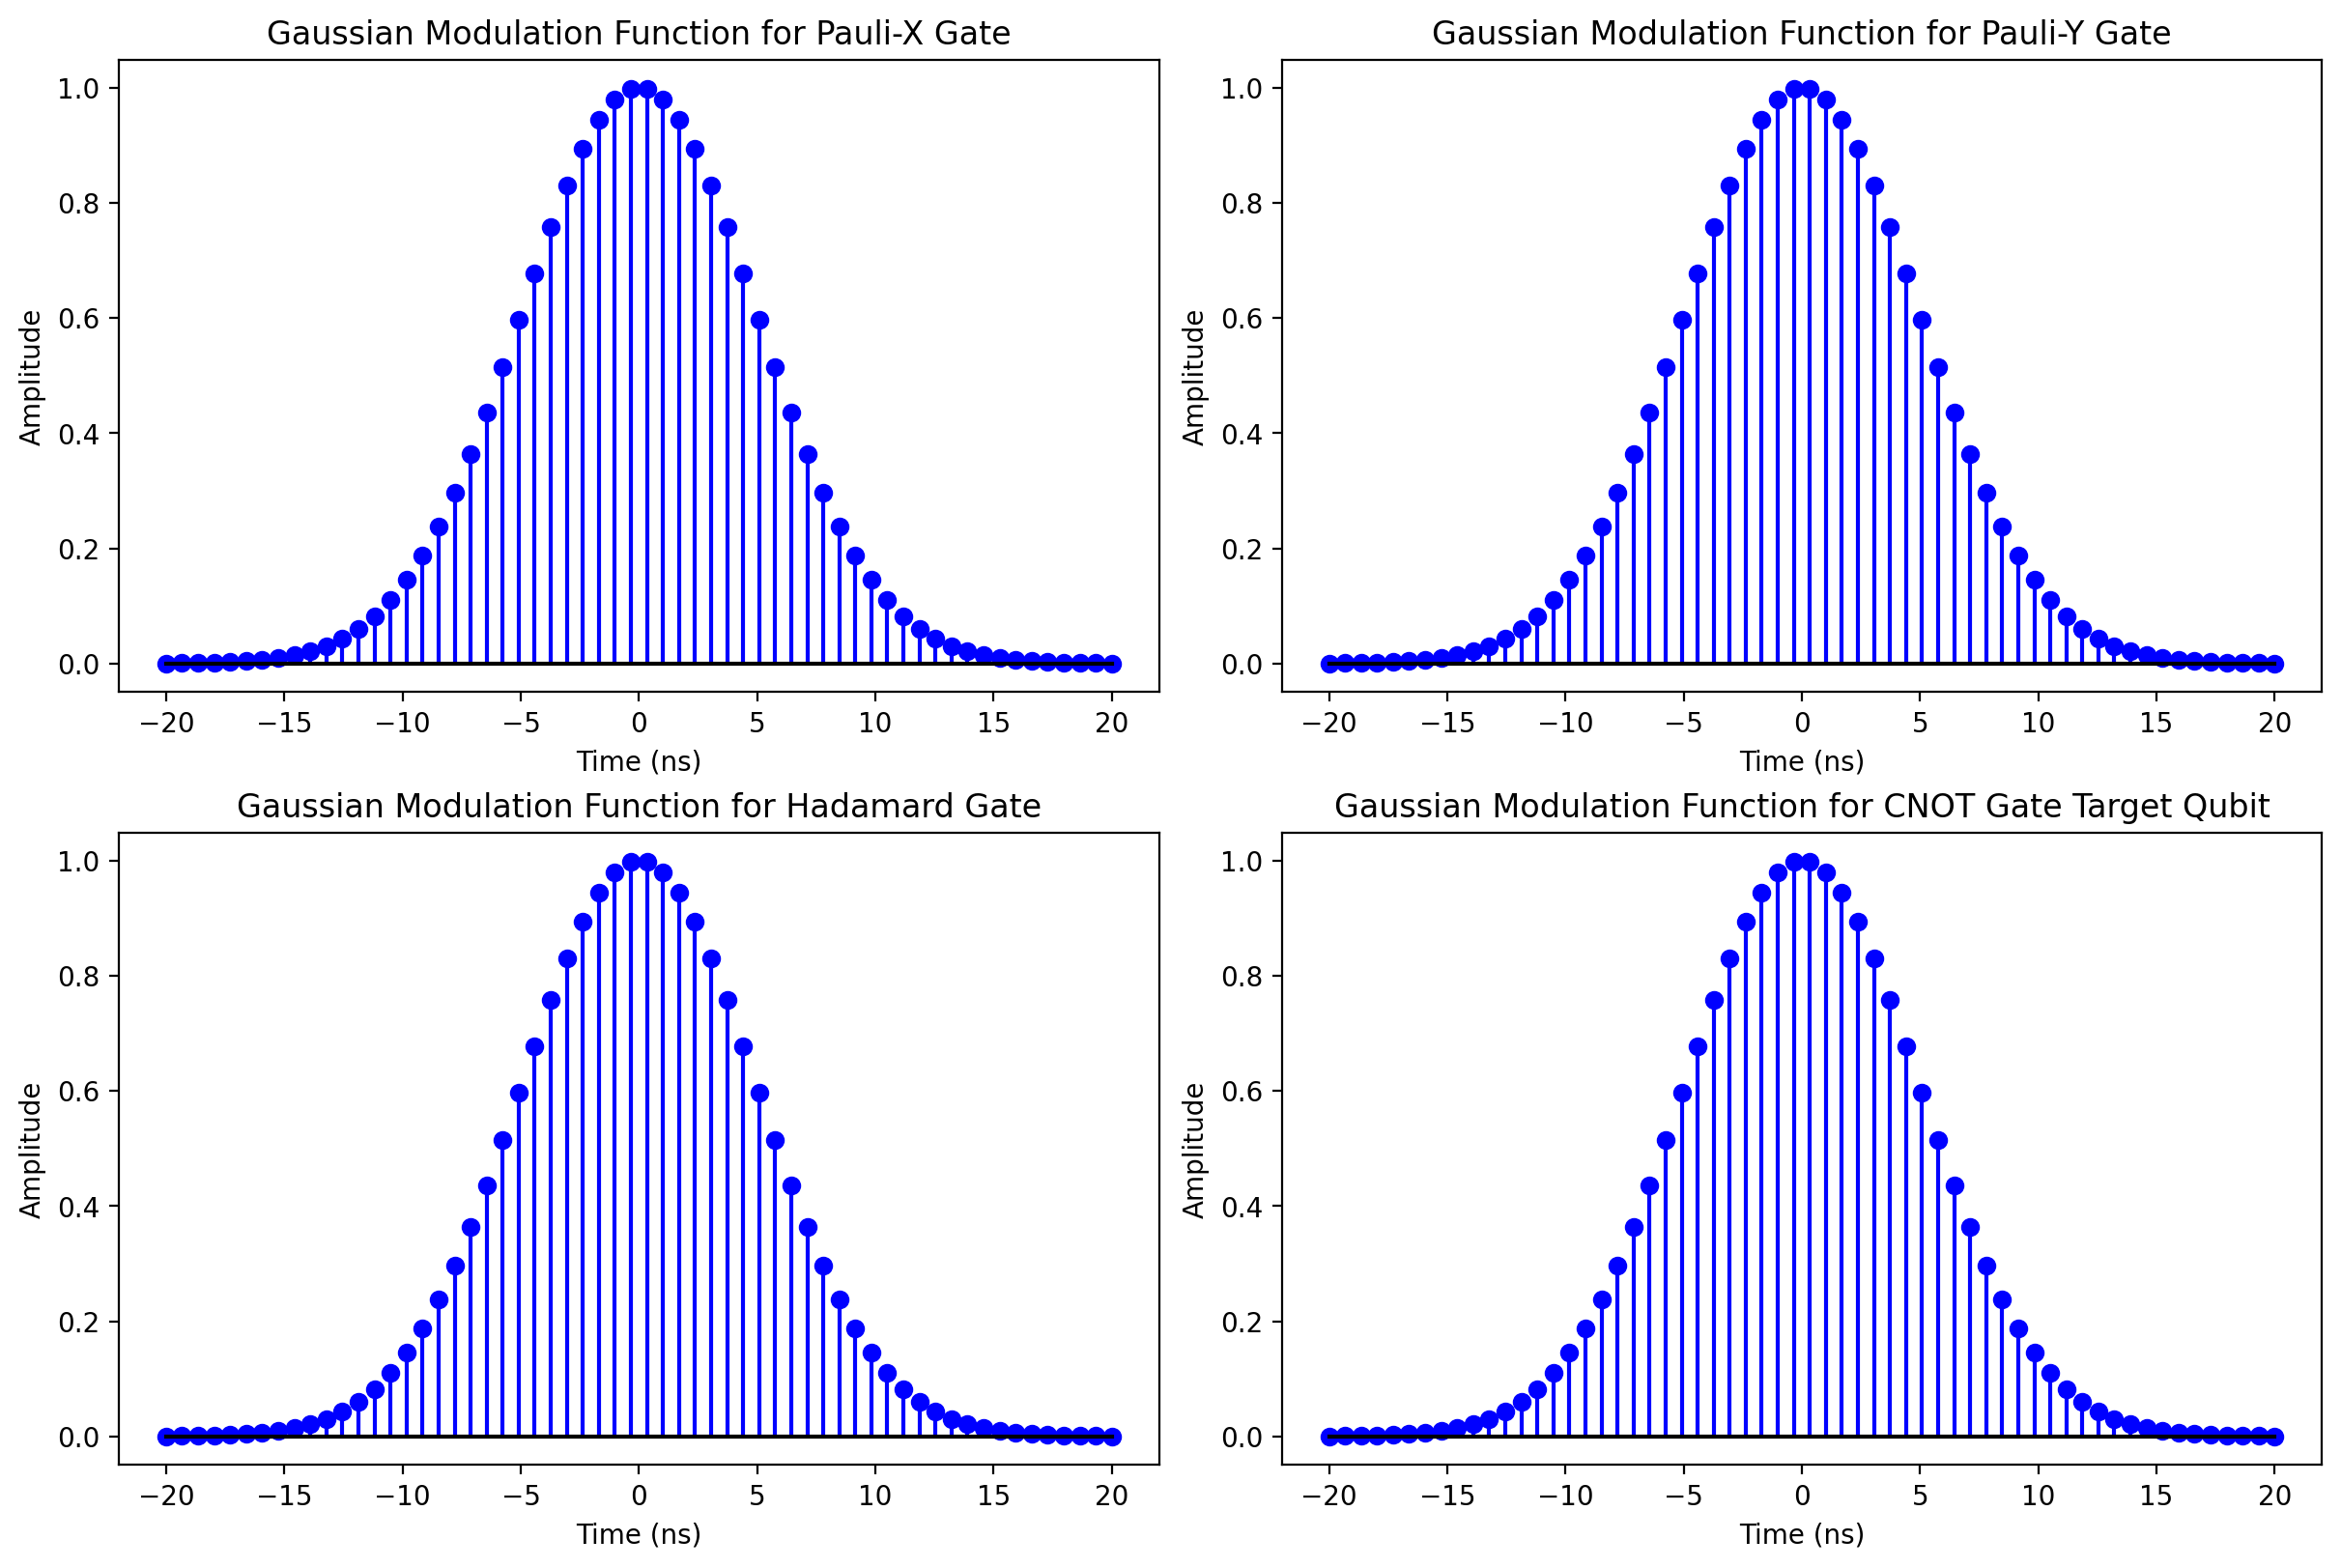

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t0 = 0      # Pulse center
sigma = 5   # Standard deviation of Gaussian modulation function (ns)
A0 = 1      # Peak amplitude

# Increase the number of points by 1.5x for denser lollipop visualization
num_points = int(40 * 1.5)
t = np.linspace(-20, 20, num_points)  # Adjusted time axis

# Compute Gaussian modulation function
gaussian_modulation = A0 * np.exp(-(t - t0)**2 / (2 * sigma**2))

# Store modulation functions and titles in an array
modulations = [
    (gaussian_modulation, "Gaussian Modulation Function for Pauli-X Gate"),
    (gaussian_modulation, "Gaussian Modulation Function for Pauli-Y Gate"),
    (gaussian_modulation, "Gaussian Modulation Function for Hadamard Gate"),
    (gaussian_modulation, "Gaussian Modulation Function for CNOT Gate Target Qubit")
]

# Create lollipop plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axs = axs.flatten()

for ax, (modulation, title) in zip(axs, modulations):
    ax.stem(t, gaussian_modulation, linefmt='b-', markerfmt='bo', basefmt='k-')
    ax.set_title(title)
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("Amplitude")

plt.show()

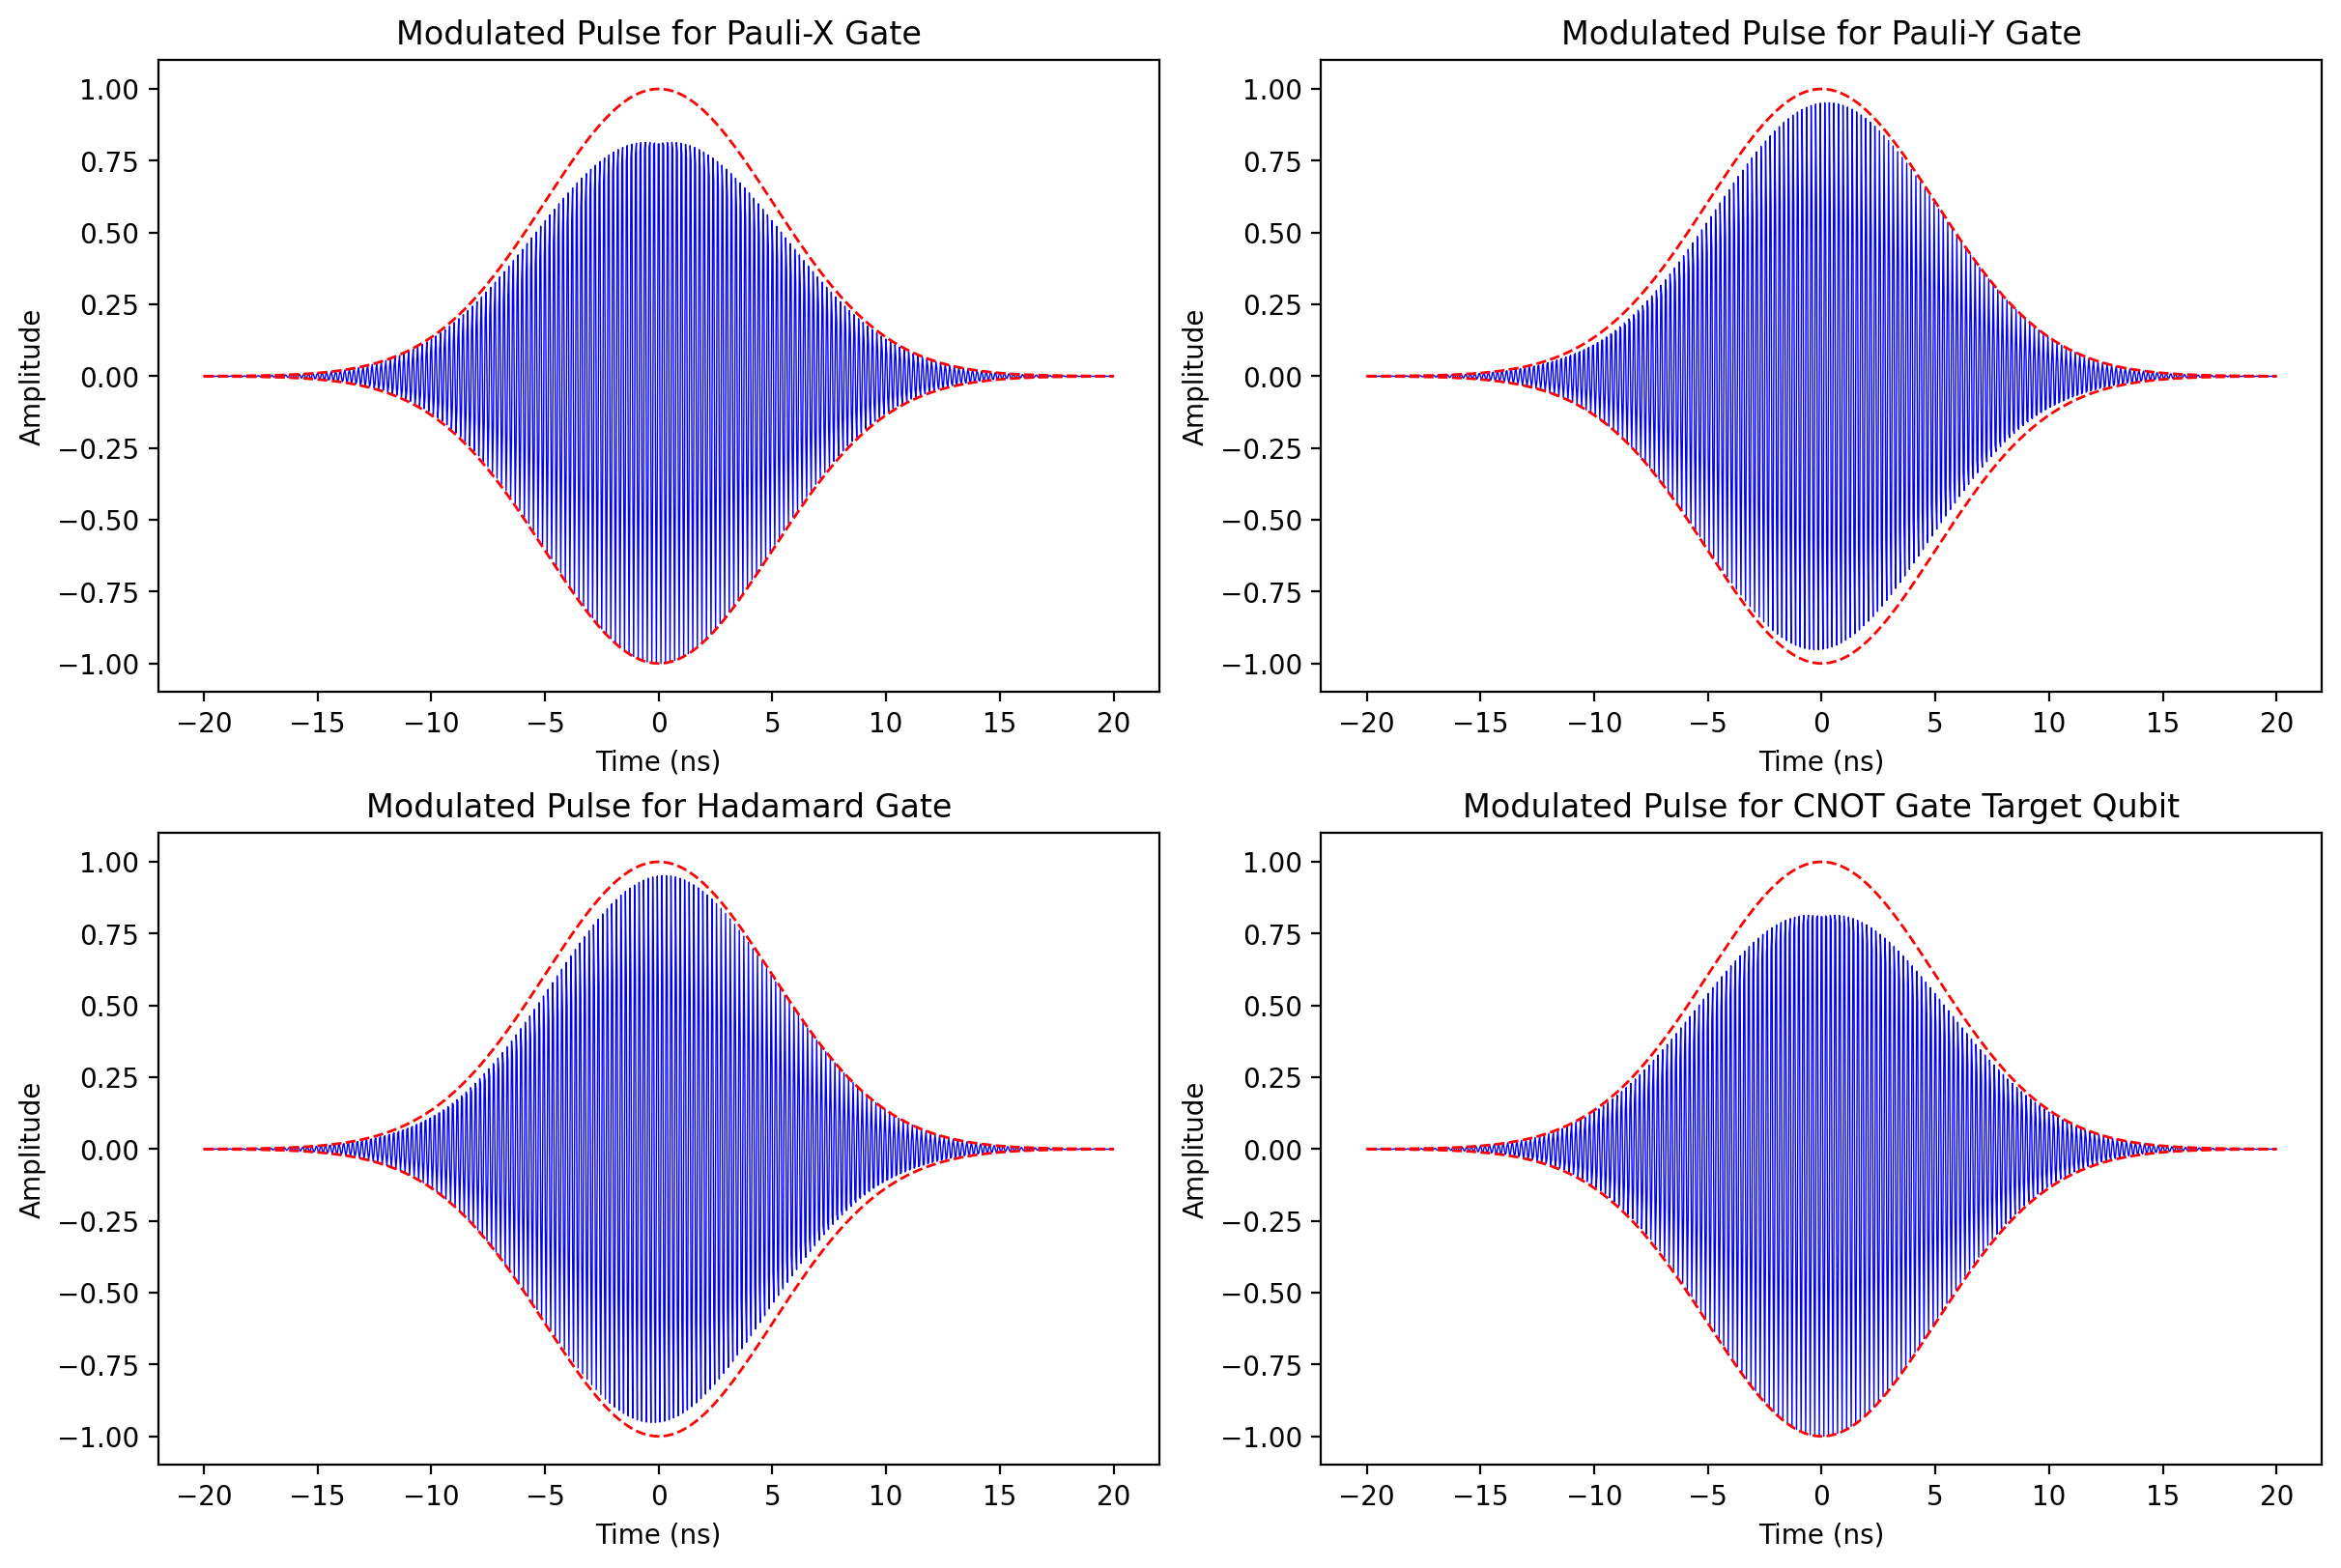

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t0 = 0      # Pulse center
sigma = 5   # Standard deviation of Gaussian modulation (ns)
A0 = 1      # Peak amplitude
fc = 5e9    # Carrier frequency (5 GHz, typical for superconducting qubits)
phi_X = 0           # X gate (Pauli-X) - $\pi$ rotation around X-axis
phi_Y = np.pi / 2   # Y gate (Pauli-Y) - $\pi/2$ rotation around Y-axis
phi_H = np.pi / 2   # Hadamard gate (H) - $\pi/2$ rotation around Y-axis
t = np.linspace(-20, 20, 1000)  # Time axis in nanoseconds

# Compute Gaussian modulation function
gaussian_envelope = A0 * np.exp(-(t - t0)**2 / (2 * sigma**2))

# Compute modulated pulses for X, Y, H, and CNOT gates
modulated_pulse_X = gaussian_envelope * np.cos(2 * np.pi * fc * t * 1e-9 + phi_X)
modulated_pulse_Y = gaussian_envelope * np.cos(2 * np.pi * fc * t * 1e-9 + phi_Y)
modulated_pulse_H = gaussian_envelope * np.cos(2 * np.pi * fc * t * 1e-9 + phi_H)
modulated_pulse_CNOT = gaussian_envelope * np.cos(2 * np.pi * fc * t * 1e-9 + phi_X)  # Similar to X gate

# Store pulses and titles in an array
pulses = np.array([
    (modulated_pulse_X, "Pauli-X Gate"),
    (modulated_pulse_Y, "Pauli-Y Gate"),
    (modulated_pulse_H, "Hadamard Gate"),
    (modulated_pulse_CNOT, "CNOT Gate Target Qubit")
], dtype=object)

# Create plots with blue pulse lines
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axs = axs.flatten()

for ax, (pulse, title) in zip(axs, pulses):
    ax.plot(t, pulse, 'b', linewidth=0.5, label=f"{title} Modulated Pulse")  # Blue line with reduced thickness
    ax.plot(t, gaussian_envelope, 'r--', linewidth=1.0, label="Gaussian Envelope")
    ax.plot(t, -gaussian_envelope, 'r--', linewidth=1.0)
    ax.set_title(f"Modulated Pulse for {title}")
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("Amplitude")
    # ax.legend()
    # ax.grid()

plt.show()